# Office Product - Data Loading and Preprocessing

In [1]:
import json    #imported json to read the file as the given data is in json format

import pandas as pd       # library for data manipulation and analysis

data=pd.read_json(r"C:\Users\nikhi\Downloads\Office_Products.json\Office_Products.json",lines=True,nrows=1000000) # reading json file
# lines = True --->    This tells pandas to read the file line by line rather than treating it as a single JSON object

data          # data contains 1000000 rows of data

overall vote  verified   reviewTime      reviewerID        asin  \
0             3    6     False   11 3, 2006  A2WJLOXXIB7NF3  0140503528   
1             5  NaN     False   05 9, 2006  A1RKICUK0GG6VF  0140503528   
2             5  NaN     False  03 11, 2006  A1QA5E50M398VW  0140503528   
3             5   12     False  01 24, 2001  A3N0HBW8IP8CZQ  0140503528   
4             5   65     False  07 30, 2000  A1K1JW1C5CUSUZ  0140503528   
...         ...  ...       ...          ...             ...         ...   
999995        5  NaN      True  09 16, 2017  A14PZ9HXT521PR  B000Z8UNQ8   
999996        3  NaN      True  09 16, 2017  A3GK18KMYNA50B  B000Z8UNQ8   
999997        1  NaN      True  09 13, 2017  A2AZ5LS1ZJG2B1  B000Z8UNQ8   
999998        4  NaN      True  09 13, 2017  A2R44OPUSFZIZT  B000Z8UNQ8   
999999        4  NaN     False   09 9, 2017   A5OTF63JD3HFJ  B000Z8UNQ8   

                            style          reviewerName  \
0       {'Format:': ' Hardcover'}  Brandi D&#039;Angelo   
1       {'Format:': ' Hardcover'}         Karen Mallory   
2       {'Format:': ' Paperback'}      Jennifer Edwards   
3       {'Format:': ' Paperback'}     Melissa P. Cooper   
4       {'Format:': ' Paperback'}       Donald Mitchell   
...                           ...                   ...   
999995                        NaN              Emily K.   
999996                        NaN       Amazon Customer   
999997                        NaN            sweettreat   
999998                        NaN                Yogesh   
999999                        NaN       Lois P Connelly   

                                               reviewText  \
0       I thought the book was entertaining and cute, ...   
1       This adorable story is an all time favorite fa...   
2       Lisa's bear Corduroy gets lost in the laundrom...   
3       In this installment of Corduroy's adventures w...   
4       Researchers constantly find that reading to ch...   
...                                                   ...   
999995  It's a little bigger than I thought it would b...   
999996  It came early which was nice but my issue come...   
999997  Lock is a huge issue, the latch and the lock h...   
999998  It is a good sized document safe, you can fit ...   
999999  Heavy for me to lift, but that makes a good sa...   

                                                  summary  unixReviewTime  \
0           Entertaining-but maybe not for young toddlers      1162512000   
1                                               adorable!      1147132800   
2                                 A sequel to the classic      1142035200   
3          More adventures with Lisa's very own bear. . .       980294400   
4       Read to Your Child to Create Bonding and Intel...       964915200   
...                                                   ...             ...   
999995  I can find all the things and they might survi...      1505520000   
999996  It came early which was nice but my issue come...      1505520000   
999997                           Lock and latch poor made      1505260800   
999998                   It is a good sized document safe      1505260800   
999999  but that makes a good safe! It meets my needs ...      1504915200   

       image  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
...      ...  
999995   NaN  
999996   NaN  
999997   NaN  
999998   NaN  
999999   NaN  

[1000000 rows x 12 columns]

In [2]:
data.isnull().sum()         # finding the null (or) missing values in dataframe

overall                0
vote              862559
verified               0
reviewTime             0
reviewerID             0
asin                   0
style             338434
reviewerName          95
reviewText           431
summary              180
unixReviewTime         0
image             988839
dtype: int64

In [3]:
data.dropna(subset="vote",inplace=True)       # dropping the missing value rows based on the vote attribute

In [4]:
data.drop(columns=["style","image"],inplace=True)        # dropping the style,image columns from dataframe
# inplace = True means changes to happen in same dataframe or same place

In [5]:
# applying the missing value treatment

data['reviewerName']=data["reviewerName"].fillna(data["reviewerName"].mode()[0])
data['reviewText']=data["reviewText"].fillna(data["reviewText"].mode()[0])
data['summary']=data["summary"].fillna(data["summary"].mode()[0])

In [6]:
data.isnull().sum() # checking again whether any missing values exist

overall           0
vote              0
verified          0
reviewTime        0
reviewerID        0
asin              0
reviewerName      0
reviewText        0
summary           0
unixReviewTime    0
dtype: int64

In [7]:
data.shape        # checking the shape of the dataframe means (no. of rows and columns)

(137441, 10)

In [8]:
data.info()       # understand the dataframe through the information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137441 entries, 0 to 999994
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         137441 non-null  int64 
 1   vote            137441 non-null  object
 2   verified        137441 non-null  bool  
 3   reviewTime      137441 non-null  object
 4   reviewerID      137441 non-null  object
 5   asin            137441 non-null  object
 6   reviewerName    137441 non-null  object
 7   reviewText      137441 non-null  object
 8   summary         137441 non-null  object
 9   unixReviewTime  137441 non-null  int64 
dtypes: bool(1), int64(2), object(7)
memory usage: 10.6+ MB


In [9]:
data.describe()   # knowing the statistics values of function like min,max,quartile1,quartile3,median.......etc

overall  unixReviewTime
count  137441.000000    1.374410e+05
mean        3.647500    1.293861e+09
std         1.580725    1.344277e+08
min         1.000000    8.945856e+08
25%         2.000000    1.189037e+09
50%         4.000000    1.312157e+09
75%         5.000000    1.402531e+09
max         5.000000    1.525997e+09

In [10]:
data.dtypes       # checking the datatypes of each column in the dataframe

overall            int64
vote              object
verified            bool
reviewTime        object
reviewerID        object
asin              object
reviewerName      object
reviewText        object
summary           object
unixReviewTime     int64
dtype: object

In [11]:
data.head()       # checking the first five records of dataframe

overall vote  verified   reviewTime      reviewerID        asin  \
0         3    6     False   11 3, 2006  A2WJLOXXIB7NF3  0140503528   
3         5   12     False  01 24, 2001  A3N0HBW8IP8CZQ  0140503528   
4         5   65     False  07 30, 2000  A1K1JW1C5CUSUZ  0140503528   
53        5    2     False  06 22, 2015  A2I6MHMAZZDCRX  0140503528   
94        1    5     False   05 7, 2013   A5H2P1G7XOWOP  0140503528   

                        reviewerName  \
0               Brandi D&#039;Angelo   
3                  Melissa P. Cooper   
4                    Donald Mitchell   
53  Mark Baker - Carstairs Considers   
94              grandmother of three   

                                           reviewText  \
0   I thought the book was entertaining and cute, ...   
3   In this installment of Corduroy's adventures w...   
4   Researchers constantly find that reading to ch...   
53  One day, Corduroy, a stuffed bear, goes with L...   
94  Did not anyone see something disturbing about ...   

                                              summary  unixReviewTime  
0       Entertaining-but maybe not for young toddlers      1162512000  
3      More adventures with Lisa's very own bear. . .       980294400  
4   Read to Your Child to Create Bonding and Intel...       964915200  
53                               Sweet and Fun Sequel      1434931200  
94                                  Creepy and scary.      1367884800

In [12]:
data.tail()       # checking the last five records of dataframe

overall vote  verified   reviewTime      reviewerID        asin  \
999956        1    9      True  12 28, 2017  A179SKZ1AE036O  B000Z8UNQ8   
999960        1    2      True  12 22, 2017  A2AP99H4C05BIO  B000Z8UNQ8   
999973        1    3      True   11 9, 2017   AGRXZRGQODPE6  B000Z8UNQ8   
999991        1    2      True  09 28, 2017   ADFZ8S2SBHNW0  B000Z8UNQ8   
999994        1    2      True  09 20, 2017  A115HP52YMIU58  B000Z8UNQ8   

           reviewerName                                         reviewText  \
999956           Ashlee  If I could give this zero stars I would. I rea...   
999960  Sherri Marshall  The lock on the box doesn't work.  The product...   
999973      Carrie Ivie  This was my second purchase of a fire-proof sa...   
999991             C0D3  The product was shipped in a regular shipping ...   
999994        Paltroon1  Arrived damaged. Interior had broken insulatio...   

                                                  summary  unixReviewTime  
999956               10/10 DO NOT RECOMMEND. CAME BROKEN.      1514419200  
999960                                          Two Stars      1513900800  
999973  and it is a disappointment compared to my othe...      1510185600  
999991                                       Poor quality      1506556800  
999994  It's your money and your back hefting it to th...      1505865600

In [13]:
data.sample(3)    # checking the random 3 records of dataframe

overall vote  verified  reviewTime     reviewerID        asin  \
583134        5    2      True  08 7, 2016  AEOWT5OJMN8S8  B0007OEDYI   
503762        5    2      True  01 8, 2013  ALU2YDO25V8AM  B0002ZQB0G   
481506        5   10     False  05 9, 2005  AEUPZJDOR1TL0  B0002ITR68   

             reviewerName                                         reviewText  \
583134            Heather  I love all the colors except the yellow. It's ...   
503762  Steven Lachapelle  Well I have had this less then an hour and hav...   
481506               Shen  Lets say this is the very best pen I have ever...   

            summary  unixReviewTime  
583134   Wonderful!      1470528000  
503762   HOLY MOLY!      1357603200  
481506  A solid pen      1115596800

In [14]:
#data.to_csv(r'C:\Project\tableau_df.csv',index=False)

# this is for saving the dataframe file into local machine in CSV format

# Meta Data -Data Loading and Preprocessing

In [15]:
data2=pd.read_json(r"C:\Users\nikhi\Downloads\meta_Office_Products.json\meta_Office_Products.json",lines=True,nrows=100000)
#This tells pandas to read the file line by line rather than treating it as a single JSON object

data2          # data contains 100000 rows of data

category  \
0      [Office Products, Office & School Supplies, Ed...   
1      [Office Products, Office &amp; School Supplies...   
2                                                     []   
3      [Office Products, Office & School Supplies, Ed...   
4      [Office Products, Office & School Supplies, Ed...   
...                                                  ...   
99995  [Office Products, Office & School Supplies, Wr...   
99996  [Office Products, Office & School Supplies, Wr...   
99997                                                 []   
99998  [Office Products, Office & School Supplies, Pa...   
99999  [Office Products, Office & School Supplies, De...   

                                                   tech1  \
0       class="a-keyvalue prodDetTable" role="present...   
1                                                          
2       class="a-keyvalue prodDetTable" role="present...   
3       class="a-keyvalue prodDetTable" role="present...   
4                                                          
...                                                  ...   
99995   class="a-keyvalue prodDetTable" role="present...   
99996   class="a-keyvalue prodDetTable" role="present...   
99997   class="a-keyvalue prodDetTable" role="present...   
99998   class="a-keyvalue prodDetTable" role="present...   
99999                                                      

                                             description fit  \
0      [Sequential Spelling is based on the classic O...       
1                                     [Unusual book, , ]       
2      [Pearson MyHistoryLab Online Access Code for A...       
3      [Corduroy the bear goes to the launderette wit...       
4      [<div class="aplus"> <div class="leftImage" st...       
...                                                  ...  ..   
99995  [<b>&quot;The letter express writer&apos;s emo...       
99996  [<b>&quot;The letter express writer&apos;s emo...       
99997  [Gre: 135*100 mm --- This item is made in Euro...       
99998  [Gre: 135*100 mm --- This item is made in Euro...       
99999                                     [LAPTOP STAND]       

                                                   title  \
0      Sequential Spelling Level 1 Bundle with Studen...   
1      Mathematics, Applications and Concepts, Course...   
2      Pearson MyHistoryLab Online Access Code for Am...   
3                                  A Pocket for Corduroy   
4      Social Entrepreneurship: What Everyone Needs t...   
...                                                  ...   
99995  PILOT &quot;ELABO [resin body] / Red&quot; (ni...   
99996  PILOT &quot;ELABO [resin body] / Red&quot; (ni...   
99997  LuxusOlymp 's Handmade Leather Passport Cover ...   
99998  LuxusOlymp 's Handmade Leather Passport Cover ...   
99999  Actto Blue Multiple angle Stand/Riser for lapt...   

                                                also_buy tech2  \
0                                                     []         
1                                                     []         
2                                                     []         
3      [0140501738, 0448421917, 0670063428, 042528875...         
4      [0195334760, 1613630328, 1422104060, 158648956...         
...                                                  ...   ...   
99995                                                 []         
99996                                                 []         
99997                                                 []         
99998                                                 []         
99999  [B0785PLLCH, B001D4GGQY, B0036E8V08, B003VAHYN...         

                                     brand  \
0                         STL Distributors   
1                                   bailey   
2                     Pearson MyHistoryLab   
3                Ingram Book & Distributor   
4      Visit Amazon's David Bornstein Page   
...                                    ...   
9

In [16]:
data2.columns      # checking the columns in the dataframe

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item',
       'date', 'price', 'asin', 'imageURL', 'imageURLHighRes', 'details'],
      dtype='object')

In [17]:
data2=data2[['category', 'title',
       'brand', 'main_cat', 'similar_item',
       'date', 'price', 'asin']]         # selecting  required columns from dataframe and saving changes in same dataframe
data2.head(2)

category  \
0  [Office Products, Office & School Supplies, Ed...   
1  [Office Products, Office &amp; School Supplies...   

                                               title             brand  \
0  Sequential Spelling Level 1 Bundle with Studen...  STL Distributors   
1  Mathematics, Applications and Concepts, Course...            bailey   

          main_cat                                       similar_item  \
0  Office Products   class="a-bordered a-horizontal-stripes  a-spa...   
1            Books                                                      

              date   price        asin  
0  August 15, 2014  $32.90  0012624861  
1                    $8.62  0078652669

In [18]:
data2.isnull().sum()       # checking the missing values in dataframe

category        0
title           0
brand           0
main_cat        0
similar_item    0
date            0
price           0
asin            0
dtype: int64

In [19]:
data2.dtypes               # checking the datatypes of columns in dataframe

category        object
title           object
brand           object
main_cat        object
similar_item    object
date            object
price           object
asin            object
dtype: object

In [20]:
data2.shape                # checking the no of rows and columns in dataframe

(100000, 8)

# Combining the Product Office and CD vinyl dataframe

In [21]:
merged=pd.merge(data,data2,on='asin',how='inner')      # merging the two dataframes with common column = asin and joining type =inner
merged.head(1)                    # reading the first record of merged dataframe

overall vote  verified  reviewTime      reviewerID        asin  \
0        3    6     False  11 3, 2006  A2WJLOXXIB7NF3  0140503528   

           reviewerName                                         reviewText  \
0  Brandi D&#039;Angelo  I thought the book was entertaining and cute, ...   

                                         summary  unixReviewTime  \
0  Entertaining-but maybe not for young toddlers      1162512000   

                                            category                  title  \
0  [Office Products, Office & School Supplies, Ed...  A Pocket for Corduroy   

                       brand         main_cat similar_item  \
0  Ingram Book & Distributor  Office Products                

                 date  price  
0  September 14, 2006  $0.95

In [22]:
merged.shape           # checking the no of rows and columns in dataframe

(192873, 17)

In [23]:
merged.columns         # checking the number of columns in dafaframe

Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'category',
       'title', 'brand', 'main_cat', 'similar_item', 'date', 'price'],
      dtype='object')

# Downloading the Merged Data into Local Machine

- saved data in CSV format and also Excel format

In [24]:
#merged.to_csv(r"C:\Users\nikhi\Downloads\new_office.csv",index=False)

In [25]:
#merged.to_excel(r"C:\Users\nikhi\Downloads\excel_new_office.xlsx",index=False)

- After the data saved in local machine we have computed datapreprocessing again in Microsft Excel


- Setting the date column format


- Removing the unwanted rows by filtering


- converting the columns datatypes as per data


- Checked each and every cell to maintain an proper labelling 

# Load and Read Data

In [26]:
import pandas as pd      # # library for data manipulation and analysis
dlf=pd.read_excel(r"C:\Users\nikhi\Downloads\EDA_2.xlsx")   # load and reading the data
dlf

overall  vote  verified reviewTime      reviewerID        asin  \
0            3     6     False 2006-11-03  A2WJLOXXIB7NF3  0140503528   
1            5    12     False 2001-01-24  A3N0HBW8IP8CZQ  0140503528   
2            5    65     False 2000-07-30  A1K1JW1C5CUSUZ  0140503528   
3            5     2     False 2015-06-22  A2I6MHMAZZDCRX  0140503528   
4            1     5     False 2013-05-07   A5H2P1G7XOWOP  0140503528   
...        ...   ...       ...        ...             ...         ...   
31866        1    14     False 2011-03-05   AD6UR7YTOVPSL  B000Z90B1E   
31867        1     4      True 2014-05-11   AVNP2G47GMTJF  B000Z90B1E   
31868        5     6      True 2010-09-05   ATCA5VAH5VHQ1  B000Z8UNQ8   
31869        1     2      True 2017-12-22  A2AP99H4C05BIO  B000Z8UNQ8   
31870        1     2      True 2017-09-28   ADFZ8S2SBHNW0  B000Z8UNQ8   

                           reviewerName  \
0                  Brandi D&#039;Angelo   
1                     Melissa P. Cooper   
2                       Donald Mitchell   
3      Mark Baker - Carstairs Considers   
4                  grandmother of three   
...                                 ...   
31866                              jane   
31867                 Mary Helen Sotelo   
31868                   Amazon Customer   
31869                   Sherri Marshall   
31870                              C0D3   

                                              reviewText  \
0      I thought the book was entertaining and cute, ...   
1      In this installment of Corduroy's adventures w...   
2      Researchers constantly find that reading to ch...   
3      One day, Corduroy, a stuffed bear, goes with L...   
4      Did not anyone see something disturbing about ...   
...                                                  ...   
31866  After reading the reviews I purchased this ite...   
31867  Clumsy to use and does not stay in place when ...   
31868  This product was just as described.\n\nI have ...   
31869  The lock on the box doesn't work.  The product...   
31870  The product was shipped in a regular shipping ...   

                                                 summary  unixReviewTime  \
0          Entertaining-but maybe not for young toddlers      1162512000   
1         More adventures with Lisa's very own bear. . .       980294400   
2      Read to Your Child to Create Bonding and Intel...       964915200   
3                                   Sweet and Fun Sequel      1434931200   
4                                      Creepy and scary.      1367884800   
...                                                  ...             ...   
31866                                  Very disappointed      1299283200   
31867                                       Disappointed      1399766400   
31868                                      Great product      1283644800   
31869                                          Two Stars      1513900800   
31870                                       Poor quality      1506556800   

                                                category  \
0      ['Office Products', 'Office & School Supplies'...   
1      ['Office Products', 'Office & School Supplies'...   
2      ['Office Products', 'Office & School Supplies'...   
3      ['Office Products', 'Office & School Supplies'...   
4      ['Office Products', 'Office & School Supplies'...   
...                                                  ...   
31866  ['Office Products', 'Office & School Supplies'...   
31867  ['Office Products', 'Office & School Supplies'...   
31868  ['Office Products', 'Office & School Supplies'...   
31869  ['Office Products', 'Office & School Supplies'...   
31870  ['Office Products', 'Office & School Supplies'...   

                                                   title  \
0                                  A Pocket for Corduroy   
1                                  A Pocket for Corduroy   
2                                  A Pocket for Corduroy   
3                 

# Text Preprocessing

In [27]:
import re         # regular expression for string manipulation
import nltk       # Natural Language Toolkit (nltk) library  

nltk.download('punkt')     # download the required 'punkt'  module.
# punkt needed for various text processing tasks such as tokenization, sentence splitting, and word stemming.

nltk.download('stopwords')   # download the required 'stopwords' module

from nltk.corpus import stopwords    # imports the stopwords module from the nltk corpus

def cleaning(text):        # given input as text in function
   
    # uses regular expressions to replace all characters that are not letters, spaces, hyphens, or digits from the input string with space
    text = re.sub("[^0-9A-Za-z\-\_ ]+", " ", text)
    # replace all numbers except those attached to a word with space
    text = re.sub("(?<!\w)\d+\_", "", text)
    # replace all hyphens except between two words with space
    text = re.sub("-(?!\w)|(?<!\w)-", "", text)
    # converts all the characters in the input string to lowercase.
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english')) #  set of English stopwords is created from the stopwords module imported earlier.
    words = nltk.word_tokenize(text)   # input string is tokenized into individual words using the word_tokenize function from the nltk library
    words = [word for word in words if not word in stop_words]   # the words in words variable not in stop_words variable are saved in to word variable
    text = " ".join(words)    # joining all the words without stopwords to form an corpus
    return text              # returns the final text output


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
new1=dlf['reviewText'].apply(cleaning)  # Applying the above cleaning function on specific column ( reviewText) in dlf dataframe
                                        # and saving the reviewText into an new variable 
new1

0        thought book entertaining cute introduction go...
1        installment corduroy adventures lisa see time ...
2        researchers constantly find reading children v...
3        one day corduroy stuffed bear goes lisa owner ...
4        anyone see something disturbing little friend ...
                               ...                        
31866    reading reviews purchased item daughters weddi...
31867    clumsy use stay place stamping would recommend...
31868    product described another sentrysafe safe diff...
31869    lock box work product defective key thin could...
31870    product shipped regular shipping box sentry sa...
Name: reviewText, Length: 31871, dtype: object

In [29]:
dlf['new_reviewtext']=new1    # now adding the new1 dataframe which is having cleaned reviewtext to dlf with new columnn name (new_reviewText)
dlf.head()

overall  vote  verified reviewTime      reviewerID        asin  \
0        3     6     False 2006-11-03  A2WJLOXXIB7NF3  0140503528   
1        5    12     False 2001-01-24  A3N0HBW8IP8CZQ  0140503528   
2        5    65     False 2000-07-30  A1K1JW1C5CUSUZ  0140503528   
3        5     2     False 2015-06-22  A2I6MHMAZZDCRX  0140503528   
4        1     5     False 2013-05-07   A5H2P1G7XOWOP  0140503528   

                       reviewerName  \
0              Brandi D&#039;Angelo   
1                 Melissa P. Cooper   
2                   Donald Mitchell   
3  Mark Baker - Carstairs Considers   
4              grandmother of three   

                                          reviewText  \
0  I thought the book was entertaining and cute, ...   
1  In this installment of Corduroy's adventures w...   
2  Researchers constantly find that reading to ch...   
3  One day, Corduroy, a stuffed bear, goes with L...   
4  Did not anyone see something disturbing about ...   

                                             summary  unixReviewTime  \
0      Entertaining-but maybe not for young toddlers      1162512000   
1     More adventures with Lisa's very own bear. . .       980294400   
2  Read to Your Child to Create Bonding and Intel...       964915200   
3                               Sweet and Fun Sequel      1434931200   
4                                  Creepy and scary.      1367884800   

                                            category                  title  \
0  ['Office Products', 'Office & School Supplies'...  A Pocket for Corduroy   
1  ['Office Products', 'Office & School Supplies'...  A Pocket for Corduroy   
2  ['Office Products', 'Office & School Supplies'...  A Pocket for Corduroy   
3  ['Office Products', 'Office & School Supplies'...  A Pocket for Corduroy   
4  ['Office Products', 'Office & School Supplies'...  A Pocket for Corduroy   

                       brand         main_cat                date  price  \
0  Ingram Book & Distributor  Office Products  September 14, 2006  $0.95   
1  Ingram Book & Distributor  Office Products  September 14, 2006  $0.95   
2  Ingram Book & Distributor  Office Products  September 14, 2006  $0.95   
3  Ingram Book & Distributor  Office Products  September 14, 2006  $0.95   
4  Ingram Book & Distributor  Office Products  September 14, 2006  $0.95   

                                      new_reviewtext  
0  thought book entertaining cute introduction go...  
1  installment corduroy adventures lisa see time ...  
2  researchers constantly find reading children v...  
3  one day corduroy stuffed bear goes lisa owner ...  
4  anyone see something disturbing little friend ...

In [30]:
# creating an sentiment column based on condition over overall columns through a function

def categorize(dlf):
    
    if dlf['overall'] == 3:   # if overall value is 3 then its neutral
        result = 'Neutral'
        
    elif dlf['overall'] > 3:   # if overall value is more than 3 its postive
        result = 'Positive'
        
    elif dlf['overall'] < 3:   # if overall value is less than 3 its negative
        result = 'Negative'
        
    return result

In [31]:
dlf['Sentiment'] = dlf.apply(categorize, axis=1)   # creating an new column as sentiment based on the categorixze function
# to sentiment column we are applying the function. axis=1 with means apply column wise
dlf.head()

overall  vote  verified reviewTime      reviewerID        asin  \
0        3     6     False 2006-11-03  A2WJLOXXIB7NF3  0140503528   
1        5    12     False 2001-01-24  A3N0HBW8IP8CZQ  0140503528   
2        5    65     False 2000-07-30  A1K1JW1C5CUSUZ  0140503528   
3        5     2     False 2015-06-22  A2I6MHMAZZDCRX  0140503528   
4        1     5     False 2013-05-07   A5H2P1G7XOWOP  0140503528   

                       reviewerName  \
0              Brandi D&#039;Angelo   
1                 Melissa P. Cooper   
2                   Donald Mitchell   
3  Mark Baker - Carstairs Considers   
4              grandmother of three   

                                          reviewText  \
0  I thought the book was entertaining and cute, ...   
1  In this installment of Corduroy's adventures w...   
2  Researchers constantly find that reading to ch...   
3  One day, Corduroy, a stuffed bear, goes with L...   
4  Did not anyone see something disturbing about ...   

                                             summary  unixReviewTime  \
0      Entertaining-but maybe not for young toddlers      1162512000   
1     More adventures with Lisa's very own bear. . .       980294400   
2  Read to Your Child to Create Bonding and Intel...       964915200   
3                               Sweet and Fun Sequel      1434931200   
4                                  Creepy and scary.      1367884800   

                                            category                  title  \
0  ['Office Products', 'Office & School Supplies'...  A Pocket for Corduroy   
1  ['Office Products', 'Office & School Supplies'...  A Pocket for Corduroy   
2  ['Office Products', 'Office & School Supplies'...  A Pocket for Corduroy   
3  ['Office Products', 'Office & School Supplies'...  A Pocket for Corduroy   
4  ['Office Products', 'Office & School Supplies'...  A Pocket for Corduroy   

                       brand         main_cat                date  price  \
0  Ingram Book & Distributor  Office Products  September 14, 2006  $0.95   
1  Ingram Book & Distributor  Office Products  September 14, 2006  $0.95   
2  Ingram Book & Distributor  Office Products  September 14, 2006  $0.95   
3  Ingram Book & Distributor  Office Products  September 14, 2006  $0.95   
4  Ingram Book & Distributor  Office Products  September 14, 2006  $0.95   

                                      new_reviewtext Sentiment  
0  thought book entertaining cute introduction go...   Neutral  
1  installment corduroy adventures lisa see time ...  Positive  
2  researchers constantly find reading children v...  Positive  
3  one day corduroy stuffed bear goes lisa owner ...  Positive  
4  anyone see something disturbing little friend ...  Negative

In [32]:
from sklearn.preprocessing import LabelEncoder  # converting the records from categorical to numerical values

In [33]:
encod = LabelEncoder()    # assigning to an variable

# applying the labelencoder on the dataframe on column sentiment

#dlf['Sentiment']=encod.fit_transform(dlf['Sentiment'])

In [34]:
# dropped the unwanted columns for the sentiment alanysis
new_dlf=dlf.drop(['overall','vote','verified','reviewTime','reviewerID','asin','reviewerName','reviewText','summary','unixReviewTime','category','title','brand','main_cat','date','price'],axis=1)
new_dlf

new_reviewtext Sentiment
0      thought book entertaining cute introduction go...   Neutral
1      installment corduroy adventures lisa see time ...  Positive
2      researchers constantly find reading children v...  Positive
3      one day corduroy stuffed bear goes lisa owner ...  Positive
4      anyone see something disturbing little friend ...  Negative
...                                                  ...       ...
31866  reading reviews purchased item daughters weddi...  Negative
31867  clumsy use stay place stamping would recommend...  Negative
31868  product described another sentrysafe safe diff...  Positive
31869  lock box work product defective key thin could...  Negative
31870  product shipped regular shipping box sentry sa...  Negative

[31871 rows x 2 columns]

In [35]:
#new_dlf.to_csv(r"C:\Users\nikhi\Downloads\word_cloud.csv",index=False)

In [36]:
# creating an new dataframe new_dlf and creating a column (summary) and saving the summary data into it from dlf 
new_dlf['Summary']=dlf['summary']

In [37]:
new_dlf['Sentiment'].value_counts()   # checking the count of each class in the object of sentiment from new_dlf dataframe

Positive    20525
Negative     9031
Neutral      2315
Name: Sentiment, dtype: int64

In [38]:
corpus = []    # a empty list to save the corpus ( text document)

for i in range(0, len(dlf)):    # iterations from 0 to length of dlf dataframe
    # extracting the value at row i and column 'new_reviewtext'
    review = dlf.loc[i, 'new_reviewtext']  # Extract the review text from the DataFrame
    review = re.sub('\s+', ' ', review)  # Replace multiple spaces with a single space
    review = cleaning(review)  # Apply the cleaning function
    corpus.append(review)

In [39]:
corpus       # cleaned text document in list

['thought book entertaining cute introduction goes laundromat however think would get book young todder 4 due fact one scene corduroy alone dark laudromat inside wired laundry cart looks terrified picture scary sad think much little kid overall cute ending good',
 'installment corduroy adventures lisa see time passed since first brought home department store taller wearing hair little straighter mom looks like makeover corduroy however wearing green overalls first book managed keep buttons time early book however corduroy decides needs pocket search one gets separated lisa mom laundromat leave without setting meeting friendly stranger washes overalls well encounters laundromat staples powder detergent pushcarts first book lisa comes back next day needle thread come rescue book corduroy two corduroy books daughter read wonder others kind sartorial splendor corduroy arrayed next trend continued',
 'researchers constantly find reading children valuable variety ways least instilling love r

In [40]:
# term frequency-inverse document frequency
# TfidfVectorizer is typically used to extract features from a collection of text documents for machine learning models.
from sklearn.feature_extraction.text import TfidfVectorizer # converting text data into a numerical feature matrix.

In [41]:
tfidfv = TfidfVectorizer()   # assigning tfidfvectotizer to an varaible 

In [42]:
# X and y are the input and output data, that can be used to train and evaluate machine learning models for sentiment analysis.

X = tfidfv.fit_transform(corpus)
y = new_dlf[['Sentiment']].values

In [43]:
X        # the datatype of the X is sparse matrix

<31871x30180 sparse matrix of type '<class 'numpy.float64'>'
	with 1219391 stored elements in Compressed Sparse Row format>

In [44]:
y       # sentiment column as Y

array([['Neutral'],
       ['Positive'],
       ['Positive'],
       ...,
       ['Positive'],
       ['Negative'],
       ['Negative']], dtype=object)

In [45]:
import numpy as np # creating and manipulating arrays

(unique, counts) = np.unique(y, return_counts=True)     ##here using np.unique and return_counts we are finding the unique values and and storing them in unique and also count of unique values in counts"""
frequencies = np.asarray((unique, counts)).T   #  creating an varaible and applying array on unique and counts to display each unique value countS

print(frequencies)

# 0 is Negative
# 1 is Neutral
# 2 is Positive

[['Negative' 9031]
 ['Neutral' 2315]
 ['Positive' 20525]]


# Classifier Model 

- 0 is Negative
- 1 is Neutral
- 2 is Positive

In [46]:
from sklearn.model_selection import train_test_split   # for model training and testing we seperate data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.ensemble import RandomForestClassifier    # one of the multi class classification model
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,f1_score,precision_score  # evaluation metrics

In [48]:
rand_forest = RandomForestClassifier()    # assigning Random_Forest_Classifier to an variable 

In [49]:
rand_forest.fit(X_train, y_train)        # building and training the model
y_pred = rand_forest.predict(X_test)      # predicting y_pred from the model using x_test

C:\Users\nikhi\AppData\Local\Temp\ipykernel_2580\1182808852.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_forest.fit(X_train, y_train)        # building and training the model


In [267]:
rand_forest.score(X_train,y_train)

0.999019454032005

In [268]:
rand_forest.score(X_test,y_test)

0.92

In [50]:
# confusion matrix to know the tp,tn,fp,fn
confusion_mat=confusion_matrix(y_test,y_pred)
confusion_mat

array([[1500,    2,  269],
       [  27,  266,  163],
       [  48,    1, 4099]], dtype=int64)

In [51]:
# The accuracy score is the fraction of correct predictions out of all predictions made.
print("Accuracy:",accuracy_score(y_test[:300],y_pred[:300]))

#  the recall of the model's predictions, which is a measure of how well the model can identify positive instances
# use a weighted average, which gives more weight to the performance on classes with more samples
# if we use simple average may not give an accurate picture of the model's performance, because the metric may be dominated by the performance on the more frequent class.
print("Recall score:",recall_score(y_test[:300],y_pred[:300],average="weighted"))

# precision_score computes the precision of the model's predictions, which is a measure of how well the model can avoid false positives
print("Precision:",precision_score(y_test[:300],y_pred[:300],average="weighted"))

# F1 score of the model's predictions, which is a weighted average of precision and recall
print("F1 score:",f1_score(y_test[:300],y_pred[:300],average="weighted"))

Accuracy: 0.9333333333333333
Recall score: 0.9333333333333333
Precision: 0.9351855905152759
F1 score: 0.9315967673413718


# Interpretation :- 

   - the model appears to be performing well with high accuracy, precision, recall and F1 scores.
   
   
   - An accuracy of 0.93 means that 93% of the predictions made by the model are correct.
   
   
   - A recall score of 0.93 indicates that 93% of the true positive labels have been correctly identified by the model.
   
   
   - A precision score of 0.9315 means that 93.15% of the predicted positive labels are actually true positives.
   
   
   - An F1 score of 0.9281 indicates that the model has a reasonably good balance between precision and recall.
   
   

# Sentiment Analysis

In [52]:
# actual dataset with the cleaned text and sentiment
dlf.head(2)

overall  vote  verified reviewTime      reviewerID        asin  \
0        3     6     False 2006-11-03  A2WJLOXXIB7NF3  0140503528   
1        5    12     False 2001-01-24  A3N0HBW8IP8CZQ  0140503528   

           reviewerName                                         reviewText  \
0  Brandi D&#039;Angelo  I thought the book was entertaining and cute, ...   
1     Melissa P. Cooper  In this installment of Corduroy's adventures w...   

                                          summary  unixReviewTime  \
0   Entertaining-but maybe not for young toddlers      1162512000   
1  More adventures with Lisa's very own bear. . .       980294400   

                                            category                  title  \
0  ['Office Products', 'Office & School Supplies'...  A Pocket for Corduroy   
1  ['Office Products', 'Office & School Supplies'...  A Pocket for Corduroy   

                       brand         main_cat                date  price  \
0  Ingram Book & Distributor  Office Products  September 14, 2006  $0.95   
1  Ingram Book & Distributor  Office Products  September 14, 2006  $0.95   

                                      new_reviewtext Sentiment  
0  thought book entertaining cute introduction go...   Neutral  
1  installment corduroy adventures lisa see time ...  Positive

In [53]:
dlf_text=dlf['new_reviewtext']    # saving the new_reviewText seperately into an new variable from dlf to dlf_text 
dlf_text

0        thought book entertaining cute introduction go...
1        installment corduroy adventures lisa see time ...
2        researchers constantly find reading children v...
3        one day corduroy stuffed bear goes lisa owner ...
4        anyone see something disturbing little friend ...
                               ...                        
31866    reading reviews purchased item daughters weddi...
31867    clumsy use stay place stamping would recommend...
31868    product described another sentrysafe safe diff...
31869    lock box work product defective key thin could...
31870    product shipped regular shipping box sentry sa...
Name: new_reviewtext, Length: 31871, dtype: object

In [54]:
import nltk #  # Natural Language Toolkit (nltk) library  
import matplotlib.pyplot as plt     # used for the visualization

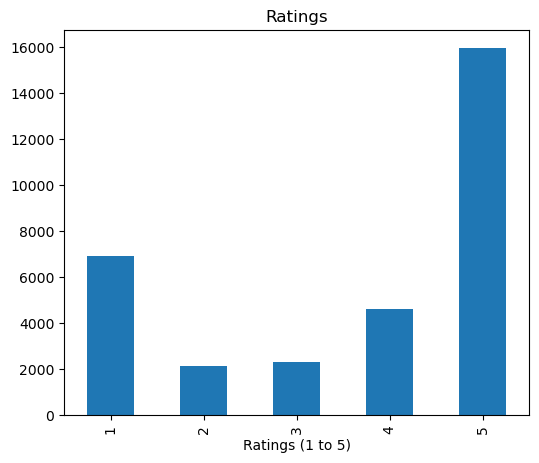

In [55]:
# counts the number of occurrences of each unique value in the 'overall' column of the 'dlf' DataFrame and sort in asc
ax = dlf['overall'].value_counts().sort_index().plot(kind='bar',
          title='Ratings',
          figsize=(6,5))
# plotting var chart with title = ratings and figuresize mentioned 
   
# given an xlabel
ax.set_xlabel('Ratings (1 to 5)')
plt.show()

## VADER Sentiment Analysis

In [56]:
# sentiment analysis tool

nltk.download('vader_lexicon')   # VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon from the Natural Language Toolkit (NLTK) library.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [57]:
from nltk.sentiment import SentimentIntensityAnalyzer   # its is a class in vader
sia = SentimentIntensityAnalyzer()      # caling in an variable

In [58]:
from tqdm.notebook import tqdm # library to add a progress bar to the loop that iterates over the rows of the dlf dataframe.


res = []   # an empty list
for i, row in tqdm(dlf.iterrows(), total=len(dlf)):   # bar staring from iterrows o to len of dlf
    text = row['new_reviewtext']          # this will iterate each row of new_reviewText and store in text variable
    res.append(sia.polarity_scores(text))    # applying  polarity_scores method of SentimentIntensityAnalyzer on text
    # then storing the scores of pos,neg,neu,compound in to the res
    # overall sentiment score ranging from -1 to 1

  0%|          | 0/31871 [00:00<?, ?it/s]

In [59]:
dlf_copy=dlf    # taking a copy of the original dataframe

In [60]:
score=pd.DataFrame(res)      # converting the res variable to dataframe and storing it into new variable score
score

neg    neu    pos  compound
0      0.223  0.563  0.214   -0.1280
1      0.037  0.792  0.171    0.9309
2      0.053  0.596  0.351    0.9987
3      0.061  0.621  0.318    0.9768
4      0.102  0.662  0.236    0.6866
...      ...    ...    ...       ...
31866  0.109  0.786  0.105   -0.0516
31867  0.000  0.645  0.355    0.5267
31868  0.069  0.554  0.377    0.8779
31869  0.116  0.884  0.000   -0.4404
31870  0.072  0.841  0.087    0.1280

[31871 rows x 4 columns]

In [61]:
# combining the original dataframe dlf and score dataframe and storing it into an new variable dataframe
df_merged = pd.concat([dlf_copy, score], ignore_index=False,axis=1)  
df_merged

overall  vote  verified reviewTime      reviewerID        asin  \
0            3     6     False 2006-11-03  A2WJLOXXIB7NF3  0140503528   
1            5    12     False 2001-01-24  A3N0HBW8IP8CZQ  0140503528   
2            5    65     False 2000-07-30  A1K1JW1C5CUSUZ  0140503528   
3            5     2     False 2015-06-22  A2I6MHMAZZDCRX  0140503528   
4            1     5     False 2013-05-07   A5H2P1G7XOWOP  0140503528   
...        ...   ...       ...        ...             ...         ...   
31866        1    14     False 2011-03-05   AD6UR7YTOVPSL  B000Z90B1E   
31867        1     4      True 2014-05-11   AVNP2G47GMTJF  B000Z90B1E   
31868        5     6      True 2010-09-05   ATCA5VAH5VHQ1  B000Z8UNQ8   
31869        1     2      True 2017-12-22  A2AP99H4C05BIO  B000Z8UNQ8   
31870        1     2      True 2017-09-28   ADFZ8S2SBHNW0  B000Z8UNQ8   

                           reviewerName  \
0                  Brandi D&#039;Angelo   
1                     Melissa P. Cooper   
2                       Donald Mitchell   
3      Mark Baker - Carstairs Considers   
4                  grandmother of three   
...                                 ...   
31866                              jane   
31867                 Mary Helen Sotelo   
31868                   Amazon Customer   
31869                   Sherri Marshall   
31870                              C0D3   

                                              reviewText  \
0      I thought the book was entertaining and cute, ...   
1      In this installment of Corduroy's adventures w...   
2      Researchers constantly find that reading to ch...   
3      One day, Corduroy, a stuffed bear, goes with L...   
4      Did not anyone see something disturbing about ...   
...                                                  ...   
31866  After reading the reviews I purchased this ite...   
31867  Clumsy to use and does not stay in place when ...   
31868  This product was just as described.\n\nI have ...   
31869  The lock on the box doesn't work.  The product...   
31870  The product was shipped in a regular shipping ...   

                                                 summary  unixReviewTime  ...  \
0          Entertaining-but maybe not for young toddlers      1162512000  ...   
1         More adventures with Lisa's very own bear. . .       980294400  ...   
2      Read to Your Child to Create Bonding and Intel...       964915200  ...   
3                                   Sweet and Fun Sequel      1434931200  ...   
4                                      Creepy and scary.      1367884800  ...   
...                                                  ...             ...  ...   
31866                                  Very disappointed      1299283200  ...   
31867                                       Disappointed      1399766400  ...   
31868                                      Great product      1283644800  ...   
31869                                          Two Stars      1513900800  ...   
31870                                       Poor quality      1506556800  ...   

                           brand                  main_cat  \
0      Ingram Book & Distributor           Office Products   
1      Ingram Book & Distributor           Office Products   
2      Ingram Book & Distributor           Office Products   
3      Ingram Book & Distributor           Office Products   
4      Ingram Book & Distributor           Office Products   
...                          ...                       ...   
31866                     ideal.           Office Products   
31867                     ideal.           Office Products   
31868                 SentrySafe  Tools & Home Improvement   
31869                 SentrySafe  Tools & Home Improvement   
31870                 SentrySafe  Tools & Home Improvement   

                     date   price  \
0      September 14, 2006   $0.95   
1      September 14, 2006   $0.95   
2      September 14, 2006   $0.95   
3      September 14, 2006 

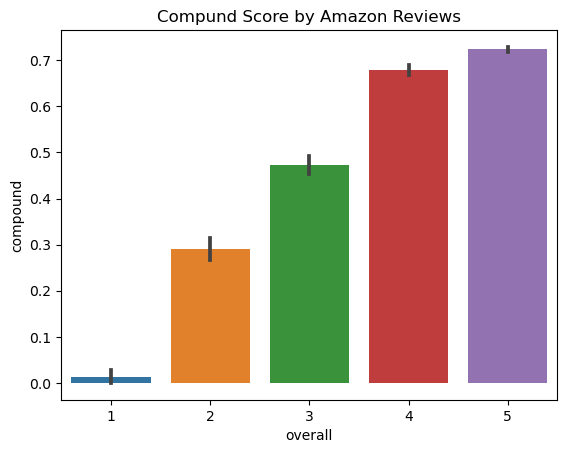

In [62]:
import seaborn as sns       # used for the visualization purpose which contains advanced tools

# using dataframe df_merged plotting barplot with x as overall and y as compound to find overall compound score
ax = sns.barplot(data=df_merged, x='overall', y='compound')  
ax.set_title('Compund Score by Amazon Reviews')          # title for the plot
plt.show()

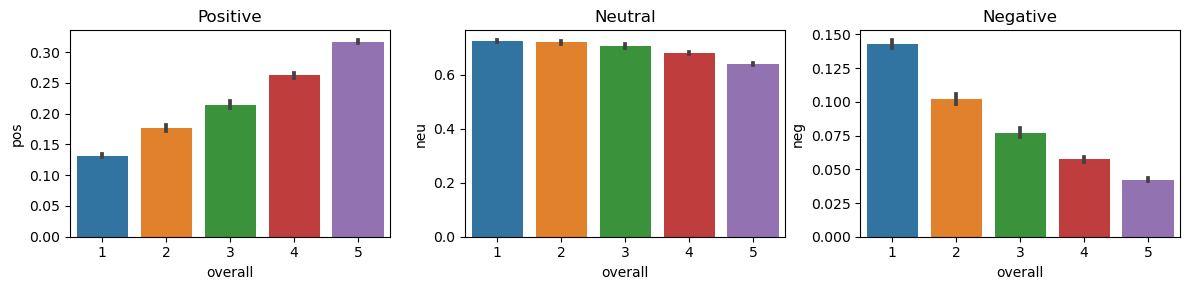

In [63]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))   # assigning number of subplots and size of plot stating 1 row 3 columns
sns.barplot(data=df_merged, x='overall', y='pos', ax=axs[0]) # 1st column shows positive score of each class in overall
sns.barplot(data=df_merged, x='overall', y='neu', ax=axs[1]) # 2nd column shows Neutral score of each class in overall
sns.barplot(data=df_merged, x='overall', y='neg', ax=axs[2]) # 3rd column shows Negative score of each class in overall
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Interpretation :-

### finding from the above analysis  is that people who write positive reviews are more likely to give higher overall ratings to a product, whereas people who write negative reviews are more likely to give lower overall ratings. It's also possible that there is a causal relationship in the opposite direction, where higher overall ratings lead people to write more positive reviews. However, without more information about the specific data and methodology used in the sentiment analysis, it's difficult to draw firm conclusions.

# Clustering of Sentiment

In [64]:
# the rows from the "df_merged" DataFrame where the value in the "Sentiment" column is "Positive"
pos_reviews = df_merged[df_merged['Sentiment'] == 'Positive']
#  then creating a new DataFrame  "pos_text" abd storing them
pos_text = pd.DataFrame(pos_reviews['summary'])
# print all the reviews which are prositive  from pos_text
print("The positive Text are \n",pos_text)

# the rows from the "df_merged" DataFrame where the value in the "Sentiment" column is "Negative"
neg_reviews = df_merged[df_merged['Sentiment'] == 'Negative']
#  then creating a new DataFrame  "neg_text" abd storing them
neg_text = pd.DataFrame(neg_reviews['summary'])     
# print all the reviews which are negative  from neg_text
print("The Negative Text are \n",neg_text)


# the rows from the "df_merged" DataFrame where the value in the "Sentiment" column is "Neutral"
neutral_reviews = df_merged[df_merged['Sentiment'] == 'Neutral']
#  then creating a new DataFrame  "neutral_text" abd storing them
neutral_text = pd.DataFrame(neutral_reviews['summary'])
# print all the reviews which are neutral  from neutral_text
print("The Neutral Text are \n",neutral_text)


The positive Text are 
                                                  summary
1         More adventures with Lisa's very own bear. . .
2      Read to Your Child to Create Bonding and Intel...
3                                   Sweet and Fun Sequel
9                                 Loved by My 2 Year Old
10                 Adorable follow up to "Corduroy" book
...                                                  ...
31861                                         Great gift
31862                                          Excellent
31863                                        Great Price
31865                                       nice product
31868                                      Great product

[20525 rows x 1 columns]
The Negative Text are 
                                             summary
4                                 Creepy and scary.
5      dread when my daughter asks me to read aloud
6                                            BEWARE
17                                

In [65]:
# the "df_merged" DataFrame and "i", which is expected to be a string value representing the sentiment (positive, negative or neutral).
def positive_reviews(df_merged,i):
    # the value in the "Sentiment" column is equal to the value of "i". The resulting DataFrame of positive reviews is assigned to the "pos_reviews" variable
    pos_reviews = df_merged[df_merged['Sentiment'] == str(i)]
    print(pos_reviews)
    global pos_text  # "global" keyword to make the "pos_text" variable available outside of the function.
    pos_text = pd.DataFrame(pos_reviews['summary'])   # creating an dataframe of new variable with the new_reviewText
    return pos_text

In [66]:
"""pip install wordcloud"""

'pip install wordcloud'

In [67]:
# The "WordCloud" class is used to generate word clouds, which are visual representations of text data in which the size of each word indicates its frequency or importance in the text.
from wordcloud import WordCloud

In [68]:
#  generates a word cloud image of the most frequent words in the text.
def pos_wc(pos_text):
    wc = WordCloud(height=400, width=600, 
               min_font_size=4, min_word_length=3,background_color='black',
              normalize_plurals=True, include_numbers=False, repeat = False) 
    # the "pos_text" DataFrame and combines them into a single string using the "join" method.
    text = " ".join(x for x in pos_text['summary'].astype(str))
    # The resulting text is then used to generate the word cloud image
    # generate is a method in WordCloud class
    wc.generate(text)
    # saving the image file
    wc.to_file('positive_wordcloud.png')
    plt.figure(figsize=(40,20))
    plt.tight_layout(pad=0)
    plt.imshow(wc, interpolation='bilinear')
    plt.show()

# Finding the Count of Frequent Words in Postive , Neutral and Negative reviewText

In [74]:
# selects only the rows from the "df_merged" DataFrame where the value in the "Sentiment" column is "Positive". Then, it selects only the "new_reviewtext" column from those rows.
# The resulting object is a pandas Series containing the positive review texts in review_pos
review_pos = df_merged[df_merged['Sentiment'] == 'Positive']['new_reviewtext']

# selects only the rows from the "df_merged" DataFrame where the value in the "Sentiment" column is "Neutral". Then, it selects only the "new_reviewtext" column from those rows.
# The resulting object is a pandas Series containing the neutral review texts in review_neu
review_neu = df_merged[df_merged['Sentiment'] == 'Neutral']['new_reviewtext']

# selects only the rows from the "df_merged" DataFrame where the value in the "Sentiment" column is "Negative". Then, it selects only the "new_reviewtext" column from those rows.
# The resulting object is a pandas Series containing the negative review texts in review_neg
review_neg = df_merged[df_merged['Sentiment'] == 'Negative']['new_reviewtext']

In [75]:
## custom function for ngram generation to find the frequently occuring phrases in a text ##

import plotly.graph_objs as go      # which is typically used for creating interactive data visualizations
#  function takes in two arguments: "text", which is expected to be a string , and "n_gram", representing the size of the n-grams to be generated 
# (1 for unigrams, 2 for bigrams, 3 for trigrams, etc.).
def generate_ngrams(text, n_gram=1):
    # input text to lowercase and splits it into individual words, removing any stopwords
    token = [token for token in str(text).lower().split(" ") if token != "" if token not in stopwords]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]


## custom function for horizontal bar chart ##
def horizontal_bar_chart(df_merged, color):
    trace = go.Bar(
        y=df_merged["word"].values[::-1],
        x=df_merged["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

In [76]:
from plotly.offline import iplot# generates an interactive HTML output that can be embedded in a web page or displayed in a notebook.

In [77]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
from plotly.offline import iplot

In [78]:
## Get the bar chart from positive reviews
from collections import defaultdict
freq_dict = defaultdict(int)
for sent in review_pos:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'orange')

## Get the bar chart from neutral reviews
freq_dict = defaultdict(int)
for sent in review_neu:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'blue')

## Get the bar chart from negative reviews
freq_dict = defaultdict(int)
for sent in review_neg:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]

trace2 = horizontal_bar_chart(fd_sorted.head(25), 'green')

# Creating two subplots
from plotly import tools
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,horizontal_spacing=0.25,
                          subplot_titles=["Bigram plots of Positive reviews", 
                                          "Bigram plots of Neutral reviews",
                                          "Bigram plots of Negative reviews"
                                          ])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)


fig['layout'].update(height=1000, width=800, paper_bgcolor='rgb(233,233,233)', title="Bigram Plots")
iplot(fig, filename='word-plots')

C:\Users\nikhi\anaconda3\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [79]:
from sklearn.preprocessing import StandardScaler      # used to keep all the columns in dataframe on a same scale
from sklearn.preprocessing import LabelEncoder        # used to convert the categorical data in to numerical data

In [80]:
scaling=StandardScaler()             # providing standardscalar in a varaible

In [81]:
df_merged.head()            # original dataframe

overall  vote  verified reviewTime      reviewerID        asin  \
0        3     6     False 2006-11-03  A2WJLOXXIB7NF3  0140503528   
1        5    12     False 2001-01-24  A3N0HBW8IP8CZQ  0140503528   
2        5    65     False 2000-07-30  A1K1JW1C5CUSUZ  0140503528   
3        5     2     False 2015-06-22  A2I6MHMAZZDCRX  0140503528   
4        1     5     False 2013-05-07   A5H2P1G7XOWOP  0140503528   

                       reviewerName  \
0              Brandi D&#039;Angelo   
1                 Melissa P. Cooper   
2                   Donald Mitchell   
3  Mark Baker - Carstairs Considers   
4              grandmother of three   

                                          reviewText  \
0  I thought the book was entertaining and cute, ...   
1  In this installment of Corduroy's adventures w...   
2  Researchers constantly find that reading to ch...   
3  One day, Corduroy, a stuffed bear, goes with L...   
4  Did not anyone see something disturbing about ...   

                                             summary  unixReviewTime  ...  \
0      Entertaining-but maybe not for young toddlers      1162512000  ...   
1     More adventures with Lisa's very own bear. . .       980294400  ...   
2  Read to Your Child to Create Bonding and Intel...       964915200  ...   
3                               Sweet and Fun Sequel      1434931200  ...   
4                                  Creepy and scary.      1367884800  ...   

                       brand         main_cat                date  price  \
0  Ingram Book & Distributor  Office Products  September 14, 2006  $0.95   
1  Ingram Book & Distributor  Office Products  September 14, 2006  $0.95   
2  Ingram Book & Distributor  Office Products  September 14, 2006  $0.95   
3  Ingram Book & Distributor  Office Products  September 14, 2006  $0.95   
4  Ingram Book & Distributor  Office Products  September 14, 2006  $0.95   

                                      new_reviewtext Sentiment    neg    neu  \
0  thought book entertaining cute introduction go...   Neutral  0.223  0.563   
1  installment corduroy adventures lisa see time ...  Positive  0.037  0.792   
2  researchers constantly find reading children v...  Positive  0.053  0.596   
3  one day corduroy stuffed bear goes lisa owner ...  Positive  0.061  0.621   
4  anyone see something disturbing little friend ...  Negative  0.102  0.662   

     pos  compound  
0  0.214   -0.1280  
1  0.171    0.9309  
2  0.351    0.9987  
3  0.318    0.9768  
4  0.236    0.6866  

[5 rows x 22 columns]

In [82]:
lc=LabelEncoder()           # assigning labelencoder into a varaible
X=df_merged.copy()          # taking a copy of original data into an new variable X

In [83]:
X=X.iloc[:,:-5]             # removing the polarity scores from the data and also sentiment column
X

overall  vote  verified reviewTime      reviewerID        asin  \
0            3     6     False 2006-11-03  A2WJLOXXIB7NF3  0140503528   
1            5    12     False 2001-01-24  A3N0HBW8IP8CZQ  0140503528   
2            5    65     False 2000-07-30  A1K1JW1C5CUSUZ  0140503528   
3            5     2     False 2015-06-22  A2I6MHMAZZDCRX  0140503528   
4            1     5     False 2013-05-07   A5H2P1G7XOWOP  0140503528   
...        ...   ...       ...        ...             ...         ...   
31866        1    14     False 2011-03-05   AD6UR7YTOVPSL  B000Z90B1E   
31867        1     4      True 2014-05-11   AVNP2G47GMTJF  B000Z90B1E   
31868        5     6      True 2010-09-05   ATCA5VAH5VHQ1  B000Z8UNQ8   
31869        1     2      True 2017-12-22  A2AP99H4C05BIO  B000Z8UNQ8   
31870        1     2      True 2017-09-28   ADFZ8S2SBHNW0  B000Z8UNQ8   

                           reviewerName  \
0                  Brandi D&#039;Angelo   
1                     Melissa P. Cooper   
2                       Donald Mitchell   
3      Mark Baker - Carstairs Considers   
4                  grandmother of three   
...                                 ...   
31866                              jane   
31867                 Mary Helen Sotelo   
31868                   Amazon Customer   
31869                   Sherri Marshall   
31870                              C0D3   

                                              reviewText  \
0      I thought the book was entertaining and cute, ...   
1      In this installment of Corduroy's adventures w...   
2      Researchers constantly find that reading to ch...   
3      One day, Corduroy, a stuffed bear, goes with L...   
4      Did not anyone see something disturbing about ...   
...                                                  ...   
31866  After reading the reviews I purchased this ite...   
31867  Clumsy to use and does not stay in place when ...   
31868  This product was just as described.\n\nI have ...   
31869  The lock on the box doesn't work.  The product...   
31870  The product was shipped in a regular shipping ...   

                                                 summary  unixReviewTime  \
0          Entertaining-but maybe not for young toddlers      1162512000   
1         More adventures with Lisa's very own bear. . .       980294400   
2      Read to Your Child to Create Bonding and Intel...       964915200   
3                                   Sweet and Fun Sequel      1434931200   
4                                      Creepy and scary.      1367884800   
...                                                  ...             ...   
31866                                  Very disappointed      1299283200   
31867                                       Disappointed      1399766400   
31868                                      Great product      1283644800   
31869                                          Two Stars      1513900800   
31870                                       Poor quality      1506556800   

                                                category  \
0      ['Office Products', 'Office & School Supplies'...   
1      ['Office Products', 'Office & School Supplies'...   
2      ['Office Products', 'Office & School Supplies'...   
3      ['Office Products', 'Office & School Supplies'...   
4      ['Office Products', 'Office & School Supplies'...   
...                                                  ...   
31866  ['Office Products', 'Office & School Supplies'...   
31867  ['Office Products', 'Office & School Supplies'...   
31868  ['Office Products', 'Office & School Supplies'...   
31869  ['Office Products', 'Office & School Supplies'...   
31870  ['Office Products', 'Office & School Supplies'...   

                                                   title  \
0                                  A Pocket for Corduroy   
1                                  A Pocket for Corduroy   
2                                  A Pocket for Corduroy   
3                 

In [84]:
X=X.apply(lc.fit_transform)         # applying the label encoder on the X variable
X.drop(columns=["reviewText"],inplace=True)

In [85]:
X=scaling.fit_transform(X)          # applying the scaling method (standard scaling)
X

array([[-0.39434665, -0.16479908, -1.40090667, ...,  1.32600263,
        -1.69019387,  1.26047528],
       [ 0.83098456,  0.18061138, -1.40090667, ...,  1.32600263,
        -1.69019387, -0.34679249],
       [ 0.83098456,  3.23173705, -1.40090667, ...,  1.32600263,
        -1.69019387,  0.93228098],
       ...,
       [ 0.83098456, -0.16479908,  0.71382343, ...,  0.88510092,
         0.19905999,  0.62761255],
       [-1.61967787, -0.39507271,  0.71382343, ...,  0.88510092,
         0.19905999, -0.17910806],
       [-1.61967787, -0.39507271,  0.71382343, ...,  0.88510092,
         0.19905999,  0.65898038]])

# K Means Clustering Algorithm

In [97]:
def convert(val):
    try:
        return float(val.replace("$",""))
    except:
        return np.nan

In [98]:
df_merged['price']=df_merged['price'].apply(convert)

In [99]:
df_merged['compound']=score["compound"]

In [100]:
df_merged.dropna(inplace=True)

In [151]:
X=df_merged[["price","compound"]].values
X

array([[ 0.95  , -0.128 ],
       [ 0.95  ,  0.9309],
       [ 0.95  ,  0.9987],
       ...,
       [35.27  ,  0.8779],
       [35.27  , -0.4404],
       [35.27  ,  0.128 ]])

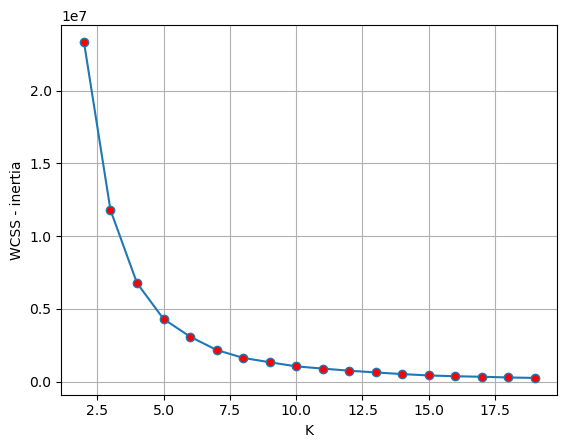

In [152]:
WCSS = []
for k in range(2, 20):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(X)
    WCSS.append(kmeans_model.inertia_)

plt.plot(range(2, 20), WCSS,marker="o",mfc='red')
plt.grid(True)
plt.xlabel('K')
plt.ylabel('WCSS - inertia')
plt.show()

In [167]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
#range_n_clusters = [2, 3, 4, 5, 6, 7]
for n_clusters in range(3,15):
 # Create a subplot with 1 row and 2 columns
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.7903886127464121
For n_clusters = 4 The average silhouette_score is : 0.7833400105760611
For n_clusters = 5 The average silhouette_score is : 0.7431858657708101
For n_clusters = 6 The average silhouette_score is : 0.7294617171234427
For n_clusters = 7 The average silhouette_score is : 0.6285902328232131
For n_clusters = 8 The average silhouette_score is : 0.6237941942409547
For n_clusters = 9 The average silhouette_score is : 0.6089620687949454
For n_clusters = 10 The average silhouette_score is : 0.6052602081776076
For n_clusters = 11 The average silhouette_score is : 0.6029014658682972
For n_clusters = 12 The average silhouette_score is : 0.5484578076641804
For n_clusters = 13 The average silhouette_score is : 0.5434550080707172
For n_clusters = 14 The average silhouette_score is : 0.5459225835964453


In [169]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3)
pr_cluster=model.fit_predict(X)
pr_cluster

array([0, 0, 0, ..., 0, 0, 0])

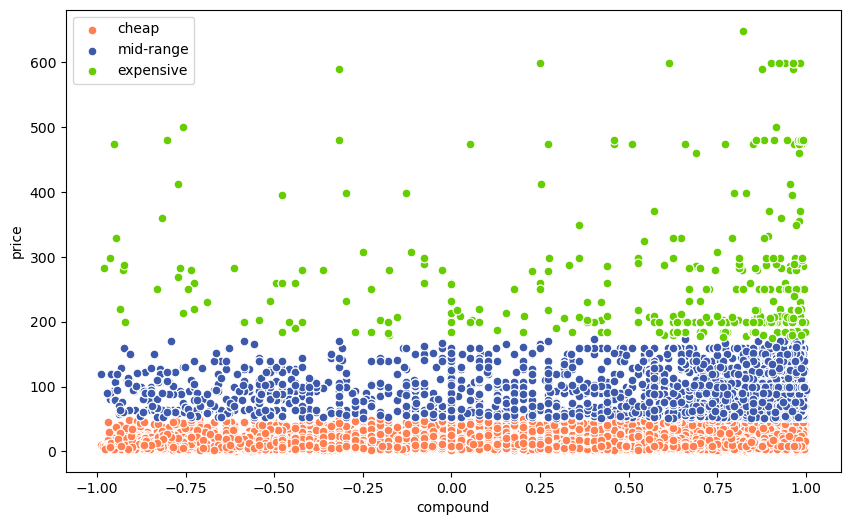

In [172]:
plt.figure(figsize=(10,6))
plt.scatter(X[pr_cluster == 0, 1], X[pr_cluster == 0, 0], s = 40 ,c = '#FF7F50',edgecolors='white',linewidth=0.8, label = 'cheap')
plt.scatter(X[pr_cluster == 1, 1], X[pr_cluster == 1, 0], s = 40 ,c = '#3D59AB',edgecolors='white',linewidth=0.8, label = 'mid-range')
plt.scatter(X[pr_cluster == 2, 1], X[pr_cluster == 2, 0], s = 40 ,c = '#66CD00',edgecolors='white',linewidth=0.8, label = 'expensive')

plt.xlabel("compound")
plt.ylabel("price")
plt.legend()
plt.show()

# Interpretation :-

#### with the help of elbow method & silhouette score we found the best 3 clusters

#### - Overall, the cheap products are getting more reviewes in positive , negative and neutral sentiments  , however the expensive one got the maximum positive reviews than the other two.

In [107]:
# to ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [108]:
df_merged.head()   # reading the original dataframe

overall  vote  verified reviewTime      reviewerID        asin  \
0        3     6     False 2006-11-03  A2WJLOXXIB7NF3  0140503528   
1        5    12     False 2001-01-24  A3N0HBW8IP8CZQ  0140503528   
2        5    65     False 2000-07-30  A1K1JW1C5CUSUZ  0140503528   
3        5     2     False 2015-06-22  A2I6MHMAZZDCRX  0140503528   
4        1     5     False 2013-05-07   A5H2P1G7XOWOP  0140503528   

                       reviewerName  \
0              Brandi D&#039;Angelo   
1                 Melissa P. Cooper   
2                   Donald Mitchell   
3  Mark Baker - Carstairs Considers   
4              grandmother of three   

                                          reviewText  \
0  I thought the book was entertaining and cute, ...   
1  In this installment of Corduroy's adventures w...   
2  Researchers constantly find that reading to ch...   
3  One day, Corduroy, a stuffed bear, goes with L...   
4  Did not anyone see something disturbing about ...   

                                             summary  unixReviewTime  ...  \
0      Entertaining-but maybe not for young toddlers      1162512000  ...   
1     More adventures with Lisa's very own bear. . .       980294400  ...   
2  Read to Your Child to Create Bonding and Intel...       964915200  ...   
3                               Sweet and Fun Sequel      1434931200  ...   
4                                  Creepy and scary.      1367884800  ...   

          main_cat                date price  \
0  Office Products  September 14, 2006  0.95   
1  Office Products  September 14, 2006  0.95   
2  Office Products  September 14, 2006  0.95   
3  Office Products  September 14, 2006  0.95   
4  Office Products  September 14, 2006  0.95   

                                      new_reviewtext Sentiment    neg    neu  \
0  thought book entertaining cute introduction go...   Neutral  0.223  0.563   
1  installment corduroy adventures lisa see time ...  Positive  0.037  0.792   
2  researchers constantly find reading children v...  Positive  0.053  0.596   
3  one day corduroy stuffed bear goes lisa owner ...  Positive  0.061  0.621   
4  anyone see something disturbing little friend ...  Negative  0.102  0.662   

     pos  compound  cluster  
0  0.214   -0.1280        0  
1  0.171    0.9309        2  
2  0.351    0.9987        2  
3  0.318    0.9768        0  
4  0.236    0.6866        0  

[5 rows x 23 columns]

# Time series forcasting for brand

In [212]:
a=df_merged[df_merged["brand"]=='Palm']
a.head(2)

overall  vote  verified reviewTime     reviewerID        asin  \
3915        5     8     False 1999-05-08  A9AF03TZQ42BG  B00000IGBF   
3916        5     8     False 1999-05-08  A9AF03TZQ42BG  B00000IGBF   

          reviewerName                                         reviewText  \
3915  dcrhodes@aol.com  It is amazing that something so small and so l...   
3916  dcrhodes@aol.com  It is amazing that something so small and so l...   

                                            summary  unixReviewTime  ...  \
3915  The Palm 3x has changed how I work and travel       926121600  ...   
3916  The Palm 3x has changed how I work and travel       926121600  ...   

             main_cat               date  price  \
3915  All Electronics  September 4, 1999  40.49   
3916  All Electronics  September 4, 1999  40.49   

                                         new_reviewtext Sentiment    neg  \
3915  amazing something small light weight much love...  Positive  0.025   
3916  amazing something small light weight much love...  Positive  0.025   

       neu    pos  compound  cluster  
3915  0.72  0.255     0.959        2  
3916  0.72  0.255     0.959        2  

[2 rows x 23 columns]

In [213]:
rating_time_df=a[['reviewTime','overall']]   # selecting the necessary columns for the timeseries analysis and saving it in new variable
rating_time_df.head()        # reading the final dataframe

reviewTime  overall
3915 1999-05-08        5
3916 1999-05-08        5
3917 2000-07-05        1
3918 2000-07-05        1
3919 2000-06-20        5

In [214]:
# Convert reviewTime to datetime format and set it as the index
rating_time_df['reviewTime'] = pd.to_datetime(rating_time_df['reviewTime'], format='%d-%m-%Y')
rating_time_df.set_index('reviewTime', inplace=True)

In [215]:
# sorting the data in ascending basis on reviewTime
rating_time_df=rating_time_df[['overall']]
rating_time_df=rating_time_df.sort_values(by='reviewTime')

In [220]:
rating_time_df

overall
reviewTime         
1999-05-08        5
1999-05-08        5
1999-07-06        5
1999-07-06        5
1999-07-27        5
...             ...
2012-12-06        3
2013-06-29        1
2013-06-29        1
2015-03-25        1
2015-03-25        1

[1596 rows x 1 columns]

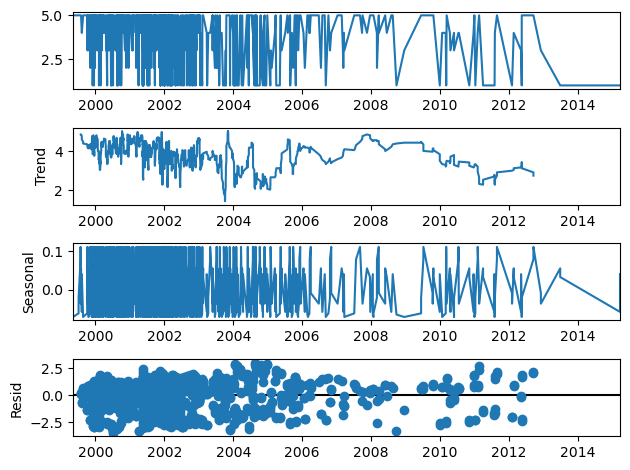

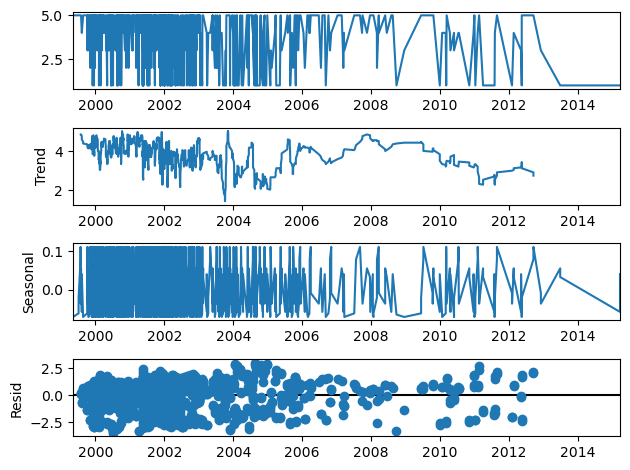

In [217]:
seasonal_decompose(rating_time_df,period=12).plot() 

In [223]:
monthly_data = rating_time_df.resample('M').mean() # The resulting "monthly_data" DataFrame contains the mean ratings for each month in the original time series dataset
monthly_data.dropna(inplace=True)

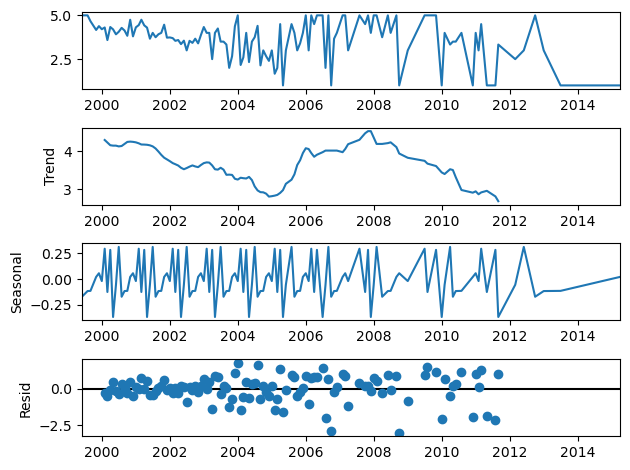

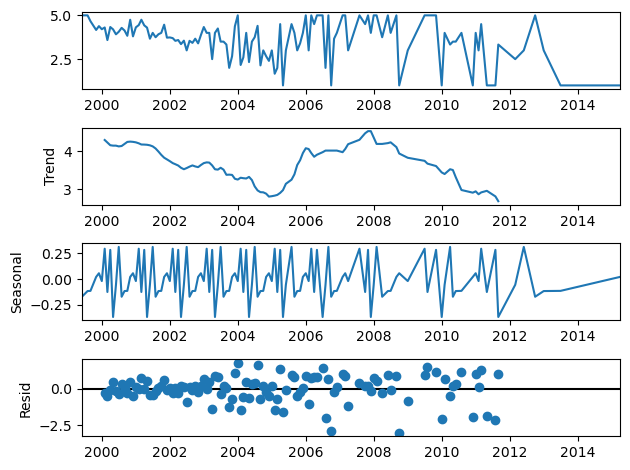

In [224]:
seasonal_decompose(monthly_data,period=12).plot() 

In [225]:
# checking monthly_data is stationary or not

# used to perform an Augmented Dickey-Fuller test on a time series to test for stationarity.
from statsmodels.tsa.stattools import adfuller
# function  "checkstationary" that takes a DataFrame of monthly time series data as its input
def checkstationary(monthly_data):
    # The output of the ADF test is a tuple containing several values, including the test statistic and the p-value.
    # In this line of code, the "[1]" index is used to extract only the p-value from the ADF test result
    pvalue=adfuller(monthly_data)[1]
    print(pvalue)
    if pvalue<0.05:
        msg='pvalue={}. Data is stationary.proceed to model building '.format(pvalue)
    else:
        msg='pvalue={}. Data is not stationary.make the data statinoary and proceed to model building '.format(pvalue)
        
    return msg

In [226]:
print(checkstationary(monthly_data))     

0.2637773404345687
pvalue=0.2637773404345687. Data is not stationary.make the data statinoary and proceed to model building 


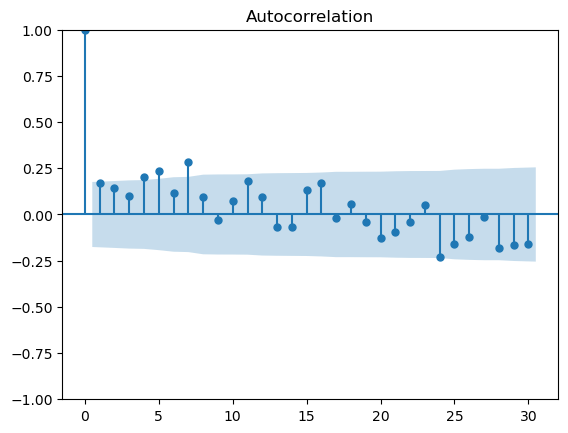

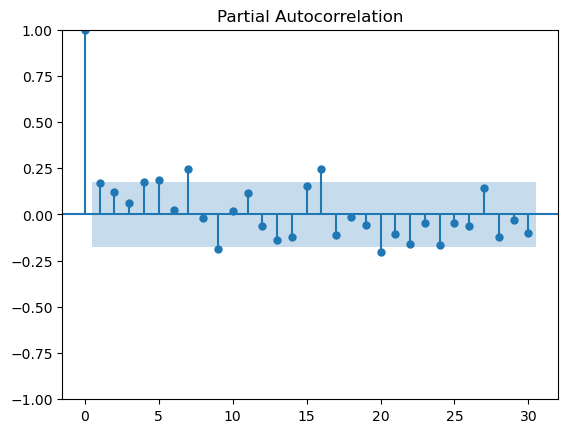

In [228]:
# "plot_acf" and "plot_pacf" functions from the "statsmodels.graphics.tsaplots" module to plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) of the "diff_overall" time series data.
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# The ACF plot shows the correlation between the values of the time series at different lags
plot_acf(monthly_data,lags=30);
# The PACF it shows the direct correlation between the values at each lag, without the influence of any other lags.
plot_pacf(monthly_data,lags=30);

In [236]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from statsmodels.tsa.arima.model import ARIMA

for p in range(1,4):
    for q in range(1,3):
        model1=ARIMA(monthly_data,order=(p,0,q))
        r1=model1.fit()
        print("value of p=",p,"and q=",q,r1.aic)

value of p= 1 and q= 1 368.0169815090895
value of p= 1 and q= 2 369.7233183514151
value of p= 2 and q= 1 369.7679051103065
value of p= 2 and q= 2 371.5873006683375
value of p= 3 and q= 1 371.36277728684837
value of p= 3 and q= 2 373.06069285888316


In [263]:
train_data, test_data = monthly_data[0:int(len(monthly_data)*0.8)], monthly_data[int(len(monthly_data)*0.8):]

In [264]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
p=1;d=0;q=1;
P=2;D=1;Q=1;
sarima_model = SARIMAX(train_data, order=(p,d,q), seasonal_order=(P,D,Q,12)) # 12 is seasonal period  (i.e., monthly data).
sarima_model_fit = sarima_model.fit()

In [265]:
# Step 1: Make predictions on the test data
predictions = sarima_model_fit.predict(start = len(train_data), end = len(train_data) + len(test_data)-1, dynamic=False)

# Step 2: Compare the predicted values with the actual values
actual = test_data['overall']
predicted = predictions

# Step 3: Calculate MSE and RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(actual, predicted)
rmse = sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)

MSE: 3.434139049826983
RMSE: 1.8531430192586278


In [255]:
# Set the number of time periods to forecast
n_periods = 12

# Make the forecast
forecast = sarima_model_fit.forecast(len(actual)+n_periods)

# Print the forecasted values
forecast.tail()

131    4.389396
132    3.909936
133    3.895323
134    3.848090
135    4.171778
Name: predicted_mean, dtype: float64

In [243]:
monthly_data

overall
reviewTime          
1999-05-31  5.000000
1999-07-31  5.000000
1999-08-31  4.666667
1999-10-31  4.166667
1999-11-30  4.384615
...              ...
2012-05-31  3.000000
2012-09-30  5.000000
2012-12-31  3.000000
2013-06-30  1.000000
2015-03-31  1.000000

[124 rows x 1 columns]

# Time Series Analysis

In [110]:
# Convert reviewTime to datetime format and set it as the index
rating_time_df['reviewTime'] = pd.to_datetime(rating_time_df['reviewTime'], format='%d-%m-%Y')
rating_time_df.set_index('reviewTime', inplace=True)

In [111]:
# sorting the data in ascending basis on reviewTime
rating_time_df=rating_time_df[['overall']]
rating_time_df=rating_time_df.sort_values(by='reviewTime')

In [112]:
rating_time_df    # reading the proper dataframe which is used for the time series analysis

overall
reviewTime         
1999-05-08        5
1999-05-08        5
1999-07-06        5
1999-07-06        5
1999-07-17        4
...             ...
2018-04-04        1
2018-04-05        1
2018-04-11        3
2018-04-20        5
2018-04-30        5

[30679 rows x 1 columns]

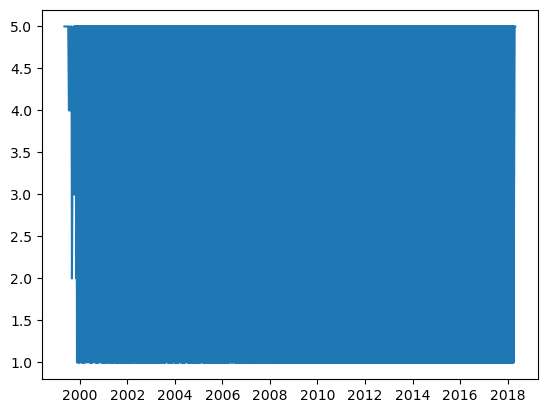

In [113]:
plt.plot(rating_time_df)     # plotting the data

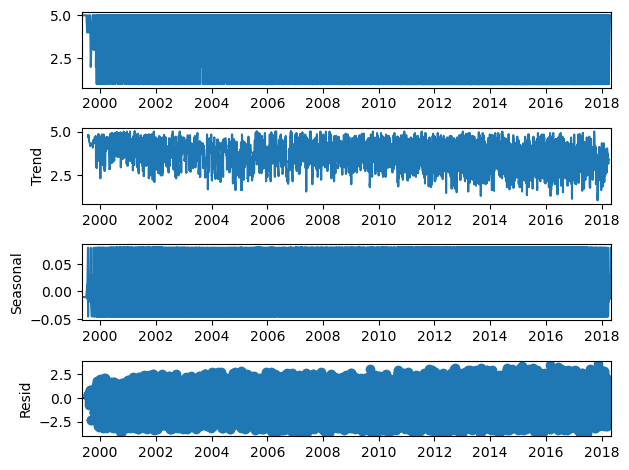

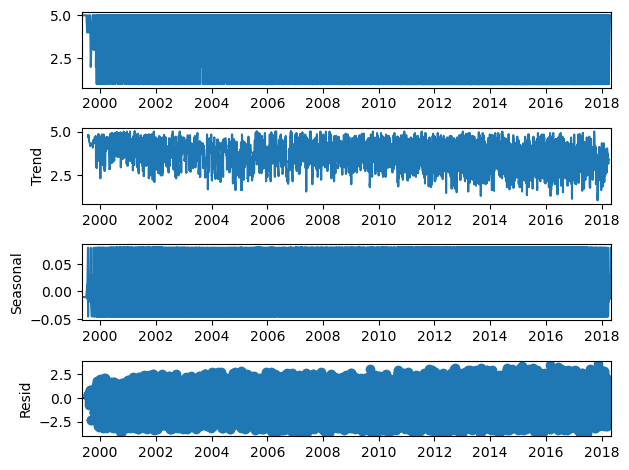

In [114]:
# importing seasonal_decompose to perform a seasonal decomposition on a time series dataset.
# help to identify patterns or trends,seasonality,cyclic,noise in the data
from statsmodels.tsa.seasonal import seasonal_decompose 

# period of 12, which suggests that the time series data has a seasonal component that repeats every 12 time periods (Months)
seasonal  m_decompose(rating_time_df,period=12).plot()  # "plot" function is then called to display the decomposition graphically.

### As we can see we cant conclude that components exist or not in the data as the plot is not clear so here we apply the resample 

In [115]:

# Resample the data to monthly frequency which reduced the data and shows the data monthly with last date
monthly_data = rating_time_df.resample('M').mean() # The resulting "monthly_data" DataFrame contains the mean ratings for each month in the original time series dataset
monthly_data

overall
reviewTime          
1999-05-31  5.000000
1999-06-30       NaN
1999-07-31  4.750000
1999-08-31  4.750000
1999-09-30  4.000000
...              ...
2017-12-31  3.000000
2018-01-31  3.480519
2018-02-28  3.056604
2018-03-31  3.333333
2018-04-30  3.571429

[228 rows x 1 columns]

In [116]:
# dropping the Nan row from dataframe
monthly_data=monthly_data.drop('1999-06-30')

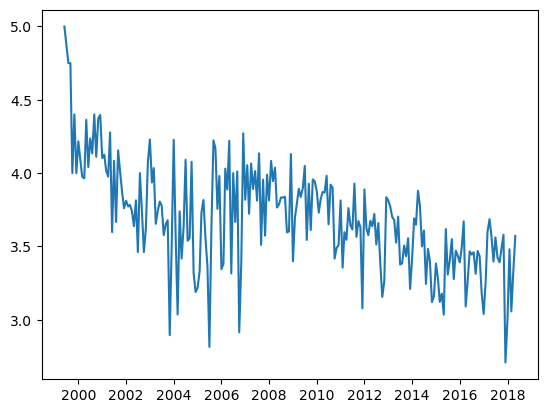

In [117]:
# after resampling the data to monthly the plot represents the data
plt.plot(monthly_data)

In [118]:
monthly_data.isnull().sum()    # checking for the missing value

overall    0
dtype: int64

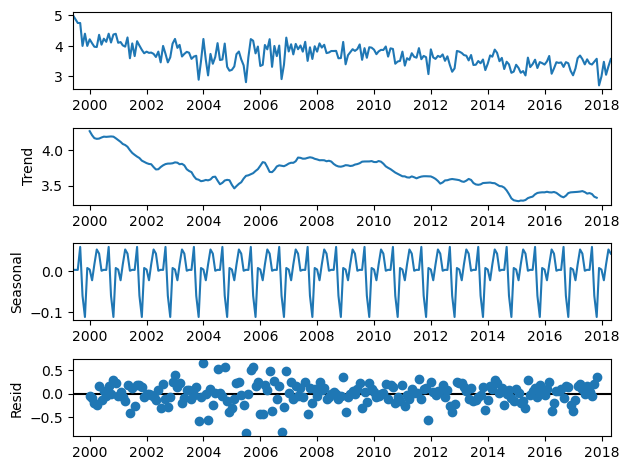

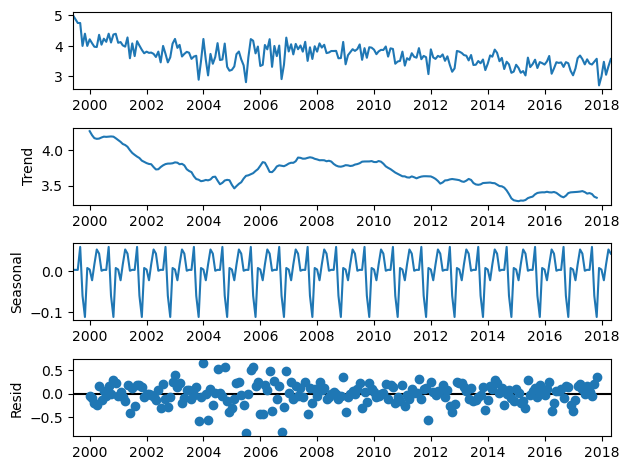

In [119]:
seasonal_decompose(monthly_data,period=12).plot()     # plotting the components of the dataframe

In [120]:
# checking monthly_data is stationary or not

# used to perform an Augmented Dickey-Fuller test on a time series to test for stationarity.
from statsmodels.tsa.stattools import adfuller
# function  "checkstationary" that takes a DataFrame of monthly time series data as its input
def checkstationary(monthly_data):
    # The output of the ADF test is a tuple containing several values, including the test statistic and the p-value.
    # In this line of code, the "[1]" index is used to extract only the p-value from the ADF test result
    pvalue=adfuller(monthly_data)[1]
    print(pvalue)
    if pvalue<0.05:
        msg='pvalue={}. Data is stationary.proceed to model building '.format(pvalue)
    else:
        msg='pvalue={}. Data is not stationary.make the data statinoary and proceed to model building '.format(pvalue)
        
    return msg

In [121]:
print(checkstationary(monthly_data))     # calling function and giving the dataframe as input to check the stationarity

0.0422146318652599
pvalue=0.0422146318652599. Data is stationary.proceed to model building 


In [122]:
# Applying the Smoothing Technique

import numpy as np
from statsmodels.tsa.api import ExponentialSmoothing     # applying the smoothing technique i.e Exponential smoothing as it looks data contains trend,seasonality,resid

# Convert the data to a numpy array
#data_array = np.asarray(monthly_data.overall)

# Fit the model with the converted data
alpha = 0.37
beta = 0.5
gamma = 0.15
model3 = ExponentialSmoothing(monthly_data, trend='add', seasonal='add', seasonal_periods=12).fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)


C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [123]:
# checking whether data has been changed to stationary or not
def checkstationary(monthly_data):
    pvalue=adfuller(monthly_data)[1]
    print(pvalue)
    if pvalue<0.05:
        msg='pvalue={}. Data is stationary.proceed to model building '.format(pvalue)
    else:
        msg='pvalue={}. Data is not stationary.make the data statinoary and proceed to model building '.format(pvalue)
        
    return msg

In [124]:
print(checkstationary(monthly_data))       # calling the stationary check model 

0.0422146318652599
pvalue=0.0422146318652599. Data is stationary.proceed to model building 


- As we see that the data is not stationary so, applying the shift method 

In [125]:
# if data is not the stationary ,make the data stationary bewfore building

diff_overall=monthly_data-monthly_data.shift()   #default shift is =1
diff_overall

overall
reviewTime          
1999-05-31       NaN
1999-07-31 -0.250000
1999-08-31  0.000000
1999-09-30 -0.750000
1999-10-31  0.400000
...              ...
2017-12-31  0.291667
2018-01-31  0.480519
2018-02-28 -0.423916
2018-03-31  0.276730
2018-04-30  0.238095

[227 rows x 1 columns]

In [126]:
# dropping the nulls from the differenced data

diff_overall.dropna(inplace=True)

In [127]:
diff_overall         # data after applying the shift and dropping the null 

overall
reviewTime          
1999-07-31 -0.250000
1999-08-31  0.000000
1999-09-30 -0.750000
1999-10-31  0.400000
1999-11-30 -0.400000
...              ...
2017-12-31  0.291667
2018-01-31  0.480519
2018-02-28 -0.423916
2018-03-31  0.276730
2018-04-30  0.238095

[226 rows x 1 columns]

In [128]:
# checking the data is stationary or not
checkstationary(diff_overall)

5.952941346069e-10


'pvalue=5.952941346069e-10. Data is stationary.proceed to model building '

- As we see that now the data is stationary so we can perform the ARIMA and SARIMA model

- These plots can be used to help identify the appropriate lag order for an autoregressive (AR) or moving average (MA) model. 

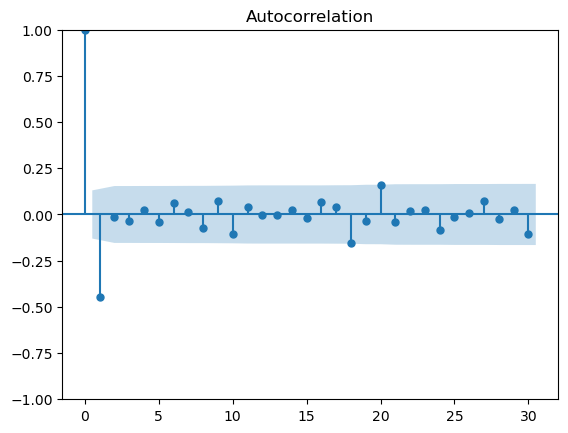

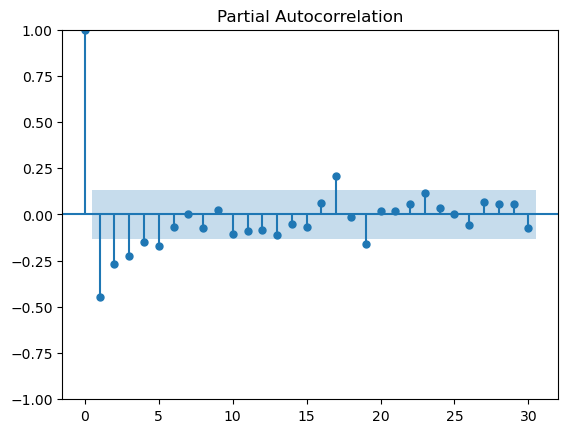

In [129]:
# "plot_acf" and "plot_pacf" functions from the "statsmodels.graphics.tsaplots" module to plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) of the "diff_overall" time series data.
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# The ACF plot shows the correlation between the values of the time series at different lags
plot_acf(diff_overall,lags=30);
# The PACF it shows the direct correlation between the values at each lag, without the influence of any other lags.
plot_pacf(diff_overall,lags=30);

q=2
p=7

In [130]:
# ARIMA models with different combinations of autoregressive (AR) and moving average (MA) orders.
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

for p in range(1,8):
    for q in range(1,3):
        model1=ARIMA(diff_overall,order=(p,0,q))
        r1=model1.fit()
        print(r1.summary())


C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  226
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -19.712
Date:                Wed, 19 Apr 2023   AIC                             47.425
Time:                        19:38:14   BIC                             61.107
Sample:                    07-31-1999   HQIC                            52.946
                         - 04-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0048      0.003     -1.923      0.054      -0.010    9.26e-05
ar.L1          0.1103      0.079      1.402      0.161      -0.044       0.265
ma.L1         -0.8804      0.037    -23.981      0.0

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  226
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 -19.707
Date:                Wed, 19 Apr 2023   AIC                             49.415
Time:                        19:38:14   BIC                             66.518
Sample:                    07-31-1999   HQIC                            56.317
                         - 04-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0048      0.003     -1.868      0.062      -0.010       0.000
ar.L1          0.1596      0.571      0.280      0.780      -0.959       1.279
ma.L1         -0.9300      0.578     -1.609      0.1

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  226
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 -19.703
Date:                Wed, 19 Apr 2023   AIC                             49.407
Time:                        19:38:15   BIC                             66.509
Sample:                    07-31-1999   HQIC                            56.309
                         - 04-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0048      0.003     -1.871      0.061      -0.010       0.000
ar.L1          0.1116      0.079      1.409      0.159      -0.044       0.267
ar.L2          0.0100      0.061      0.163      0.8

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  226
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -19.576
Date:                Wed, 19 Apr 2023   AIC                             51.151
Time:                        19:38:15   BIC                             71.675
Sample:                    07-31-1999   HQIC                            59.434
                         - 04-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0048      0.003     -1.864      0.062      -0.010       0.000
ar.L1         -0.5716      1.118     -0.511      0.609      -2.763       1.620
ar.L2          0.1046      0.106      0.983      0.3

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  226
Model:                 ARIMA(3, 0, 1)   Log Likelihood                 -19.499
Date:                Wed, 19 Apr 2023   AIC                             50.998
Time:                        19:38:16   BIC                             71.521
Sample:                    07-31-1999   HQIC                            59.280
                         - 04-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0048      0.003     -1.854      0.064      -0.010       0.000
ar.L1          0.1006      0.089      1.129      0.259      -0.074       0.275
ar.L2          0.0046      0.064      0.073      0.9

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  226
Model:                 ARIMA(3, 0, 2)   Log Likelihood                 -19.462
Date:                Wed, 19 Apr 2023   AIC                             52.924
Time:                        19:38:16   BIC                             76.868
Sample:                    07-31-1999   HQIC                            62.587
                         - 04-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0048      0.003     -1.837      0.066      -0.010       0.000
ar.L1         -0.4143      1.000     -0.414      0.679      -2.374       1.545
ar.L2          0.0630      0.142      0.443      0.6

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  226
Model:                 ARIMA(4, 0, 1)   Log Likelihood                 -19.498
Date:                Wed, 19 Apr 2023   AIC                             52.997
Time:                        19:38:17   BIC                             76.941
Sample:                    07-31-1999   HQIC                            62.660
                         - 04-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0048      0.003     -1.838      0.066      -0.010       0.000
ar.L1          0.0998      0.093      1.072      0.284      -0.083       0.282
ar.L2          0.0041      0.065      0.063      0.9

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided

                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  226
Model:                 ARIMA(4, 0, 2)   Log Likelihood                 -19.461
Date:                Wed, 19 Apr 2023   AIC                             54.921
Time:                        19:38:18   BIC                             82.285
Sample:                    07-31-1999   HQIC                            65.964
                         - 04-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0048      0.003     -1.830      0.067      -0.010       0.000
ar.L1         -0.5119      2.385     -0.215      0.830      -5.186       4.162
ar.L2          0.0694      0.233      0.298      0.7

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided

                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  226
Model:                 ARIMA(5, 0, 2)   Log Likelihood                 -19.310
Date:                Wed, 19 Apr 2023   AIC                             56.620
Time:                        19:38:20   BIC                             87.405
Sample:                    07-31-1999   HQIC                            69.043
                         - 04-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0048      0.003     -1.803      0.071      -0.010       0.000
ar.L1         -0.4179      1.377     -0.303      0.762      -3.117       2.282
ar.L2          0.0412      0.184      0.224      0.8

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided

                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  226
Model:                 ARIMA(6, 0, 2)   Log Likelihood                 -19.208
Date:                Wed, 19 Apr 2023   AIC                             58.416
Time:                        19:38:21   BIC                             92.622
Sample:                    07-31-1999   HQIC                            72.220
                         - 04-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0047      0.003     -1.780      0.075      -0.010       0.000
ar.L1         -0.2821      1.519     -0.186      0.853      -3.260       2.696
ar.L2          0.0189      0.147      0.129      0.8

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  226
Model:                 ARIMA(7, 0, 2)   Log Likelihood                 -18.817
Date:                Wed, 19 Apr 2023   AIC                             59.635
Time:                        19:38:23   BIC                             97.261
Sample:                    07-31-1999   HQIC                            74.819
                         - 04-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0049      0.003     -1.837      0.066      -0.010       0.000
ar.L1         -0.5110      0.947     -0.540      0.589      -2.367       1.345
ar.L2          0.0835      0.144      0.580      0.5

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Model with (1,0,1) is having the lowest AIC score

In [131]:
# splitting the diff_overall time series data into training and testing data using a 80-20 split.
# The first 80% of the data is assigned to the train_data variable, and the remaining 20% is assigned to the test_data variable
train_data, test_data = diff_overall[0:int(len(diff_overall)*0.8)], diff_overall[int(len(diff_overall)*0.8):]

In [132]:
test_data.shape    # records in test_data

(46, 1)

In [133]:
train_data.shape    # records in train_data

(180, 1)

In [134]:
#  Build the SARIMA model.
from statsmodels.tsa.statespace.sarimax import SARIMAX
p=1;d=1;q=1;
P=1;D=1;Q=0;
sarima_model = SARIMAX(train_data, order=(p,d,q), seasonal_order=(P,D,Q,12)) # 12 is seasonal period  (i.e., monthly data).
sarima_model_fit = sarima_model.fit()
# now the sarima_model_fit variable contains various statistics and diagnostic information about the model, such as the estimated coefficients, standard errors, and goodness-of-fit measures.

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



In [135]:
# Step 1: Make predictions on the test data
predictions = sarima_model_fit.predict(start = len(train_data), end = len(train_data) + len(test_data)-1, dynamic=False)

# Step 2: Compare the predicted values with the actual values
actual = test_data['overall']
predicted = predictions

# Step 3: Calculate MSE and RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(actual, predicted)
rmse = sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)


MSE: 0.07363730074195013
RMSE: 0.27136193679650455


In [136]:
# creating an dataframe with actual and predicted to compare the results
compare=pd.DataFrame({"Actual":actual,"Predicted":predicted})
compare

Actual  Predicted
2014-07-31 -0.364055  -0.094945
2014-08-31  0.238519   0.032361
2014-09-30 -0.085851  -0.161651
2014-10-31 -0.276488   0.136564
2014-11-30  0.039156   0.033926
2014-12-31  0.223685   0.120185
2015-01-31 -0.104499   0.146386
2015-02-28 -0.157139  -0.047771
2015-03-31  0.056064   0.132457
2015-04-30 -0.143400  -0.119994
2015-05-31  0.583896  -0.081813
2015-06-30 -0.310490  -0.066338
2015-07-31  0.096563  -0.046976
2015-08-31  0.145250   0.075010
2015-09-30 -0.272048  -0.119671
2015-10-31  0.193697   0.136420
2015-11-30 -0.033654  -0.118246
2015-12-31 -0.046942   0.161885
2016-01-31  0.104104   0.204698
2016-02-29  0.176479  -0.040382
2016-03-31 -0.580840   0.179282
2016-04-30  0.171921  -0.108325
2016-05-31  0.204124  -0.156284
2016-06-30 -0.021902   0.011607
2016-07-31  0.015649  -0.061395
2016-08-31 -0.146789   0.062798
2016-09-30  0.155890  -0.131605
2016-10-31 -0.036358   0.141964
2016-11-30 -0.248220  -0.049621
2016-12-31 -0.145822   0.150067
2017-01-31  0.222810   0.185987
2017-02-28  0.337234  -0.037964
2017-03-31  0.086675   0.165337
2017-04-30 -0.117673  -0.107682
2017-05-31 -0.171014  -0.119899
2017-06-30  0.164578  -0.015250
2017-07-31 -0.136625  -0.049928
2017-08-31 -0.033474   0.073350
2017-09-30  0.091454  -0.121169
2017-10-31  0.096952   0.145148
2017-11-30 -0.871377  -0.072611
2017-12-31  0.291667   0.160455
2018-01-31  0.480519   0.199235
2018-02-28 -0.423916  -0.033483
2018-03-31  0.276730   0.176608
2018-04-30  0.238095  -0.102464

In [137]:
# Set the number of time periods to forecast
n_periods = 12

# Make the forecast
forecast = sarima_model_fit.forecast(len(actual)+n_periods)

# Print the forecasted values
forecast.tail()

2018-12-31    0.161630
2019-01-31    0.199223
2019-02-28   -0.029857
2019-03-31    0.177416
2019-04-30   -0.099144
Freq: M, Name: predicted_mean, dtype: float64

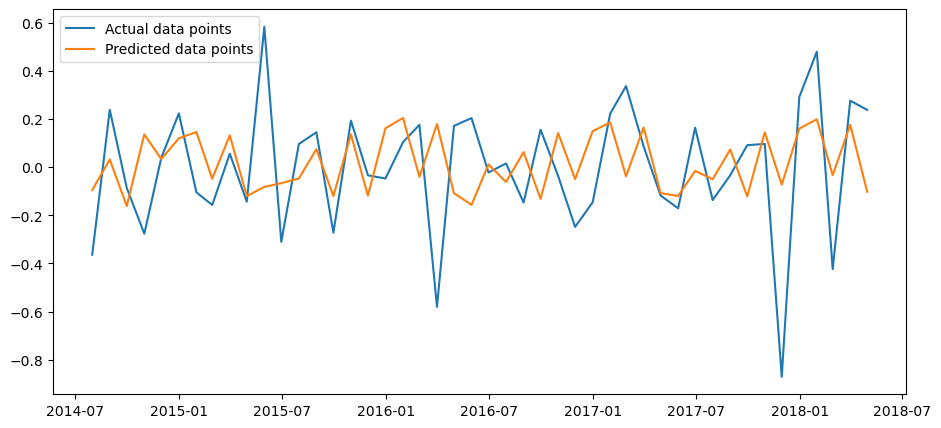

In [138]:
# displaying the Actual vs predicted 
plt.figure(figsize=(11,5))
plt.plot(actual,label='Actual data points')
plt.plot(predicted,label='Predicted data points')

plt.legend()
plt.show()

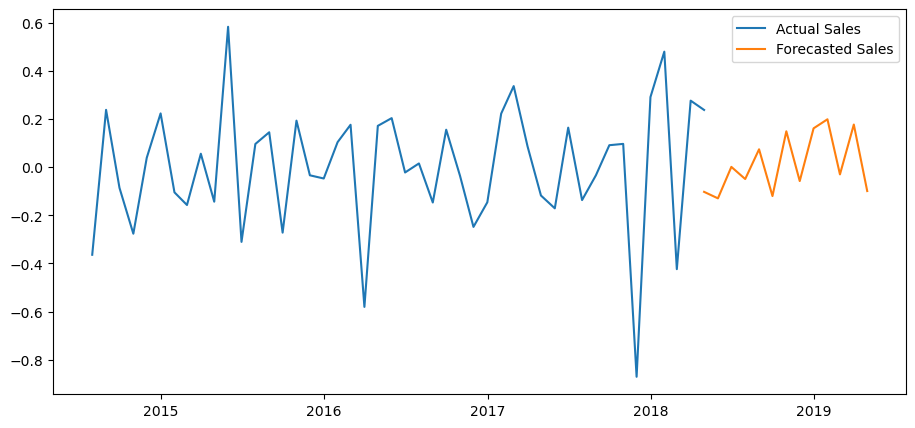

In [139]:
# displaying the actual data vs forecasted

n_forecast = 12
start_date = '2018-04-30'

plt.figure(figsize=(11,5))
plt.plot(test_data, label='Actual Sales')
plt.plot(forecast['2018-04-30':], label='Forecasted Sales')
plt.legend()
plt.show()

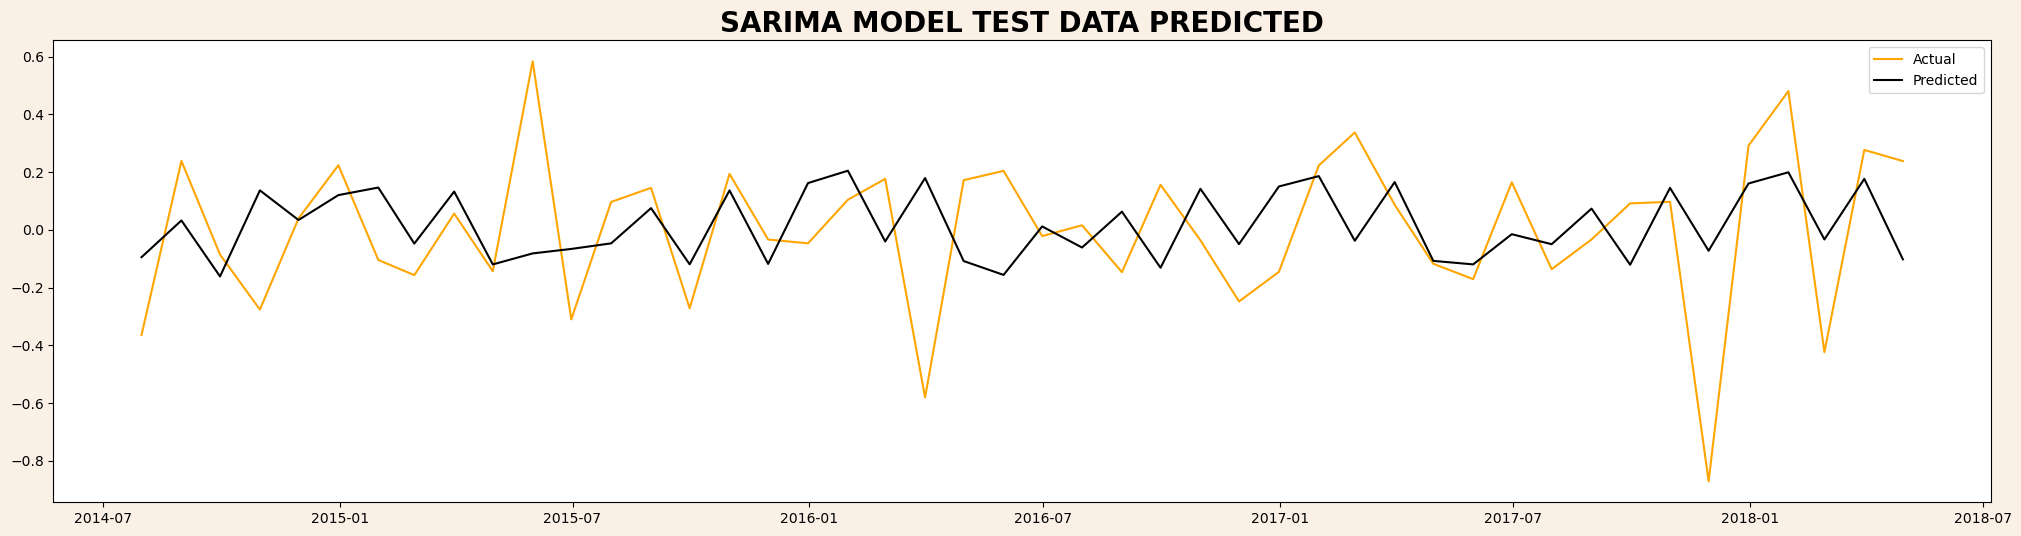

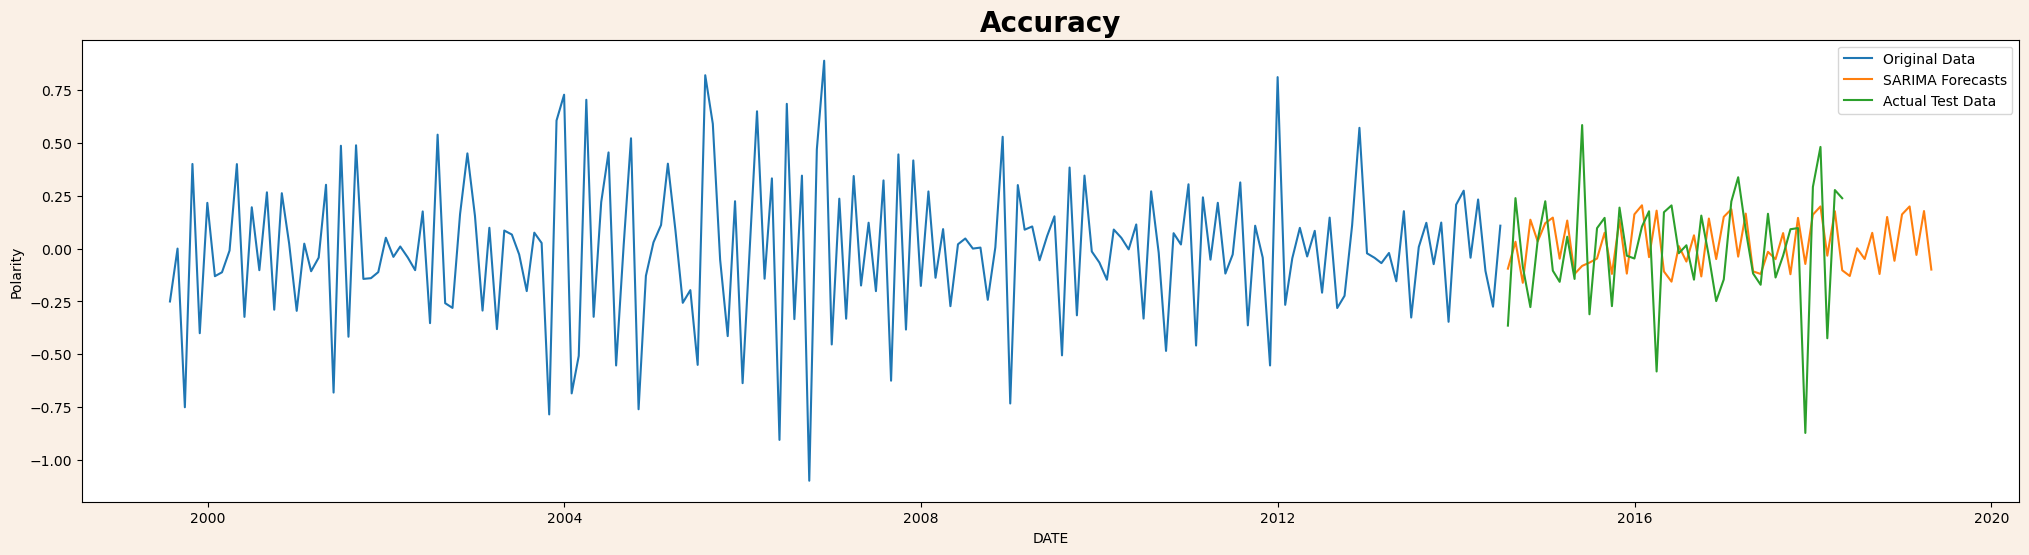

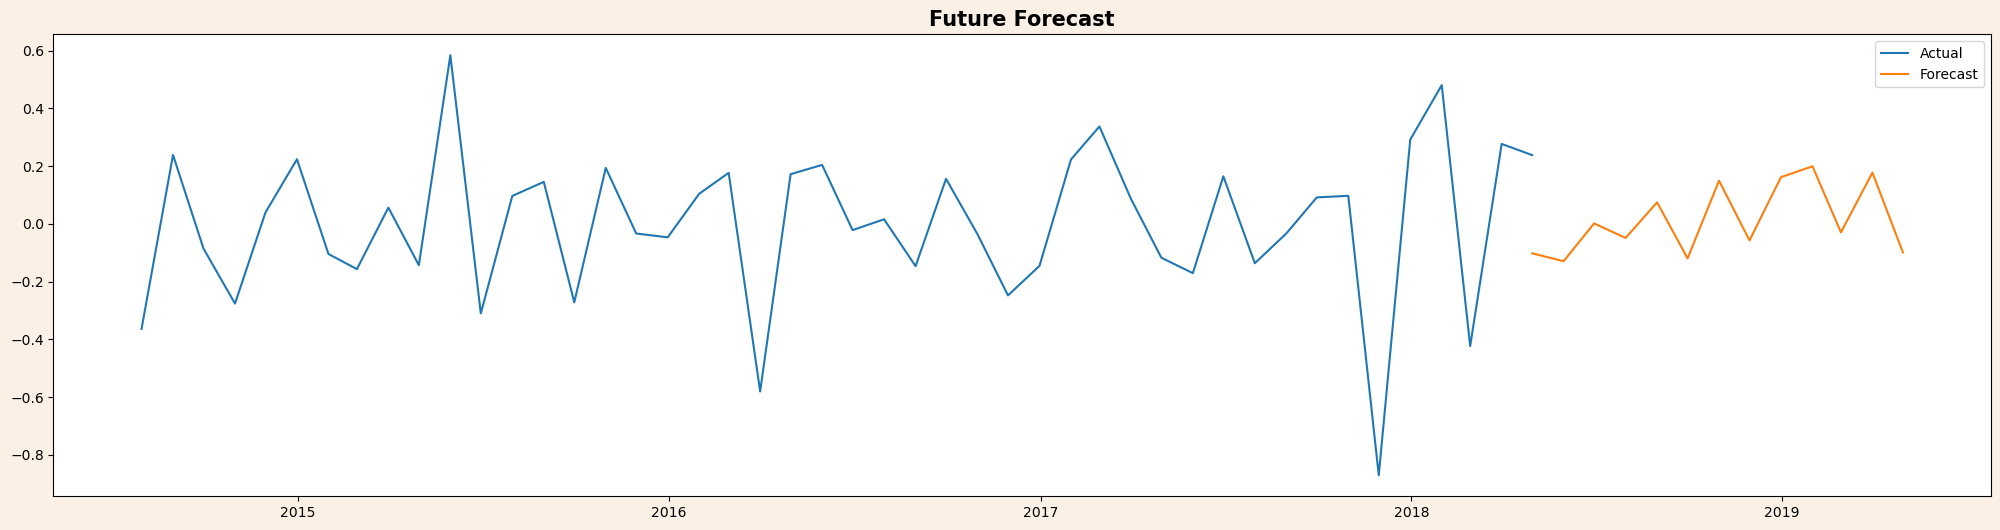

In [140]:
# displaying the predicted and actual
# accuracy which means - forecast,predicted and actual 
# displaying the forecast and actuall

plt.subplots(figsize=(25,6),facecolor ='linen')
plt.subplot(1, 1, 1)  # row 1, column 2, count 1
plt.title(f'SARIMA MODEL TEST DATA PREDICTED', fontweight='bold', size=20)
plt.plot(test_data, c='orange',label="Actual")
plt.plot(predicted, c='black',label='Predicted')
plt.legend()
plt.show()


plt.subplots(figsize=(25,6),facecolor ='linen')
#plt.subplot(2, 1, 1)
plt.title(f'Accuracy', fontweight='bold', size=20)
plt.plot(train_data, label='Original Data')
plt.plot(forecast, label='SARIMA Forecasts')
plt.plot(test_data, label='Actual Test Data')
plt.xlabel("DATE")
plt.ylabel('Polarity')
plt.legend()
plt.show()

plt.subplots(figsize=(25,6),facecolor ='linen')
#plt.subplot(3, 1, 1)
plt.title('Future Forecast', fontweight='bold',size=15)
plt.plot(actual, label = 'Actual')
plt.plot(forecast['2018-04-30':], label = 'Forecast')
plt.legend()
plt.show()